**Importing required libraries**

In [1]:
import os
import math
import time
import random
import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('seaborn')

**Importing the confirmed cases dataset using pandas**

In [2]:
covid_confirmed_cases=pd.read_csv("Confirmed_cases_dataset.csv")

In [3]:
#covid_confirmed_cases.T

**Displaying the dataset**

In [4]:
covid_confirmed_cases=covid_confirmed_cases.iloc[:,:565]

In [5]:
#india = covid_confirmed_cases[covid_confirmed_cases['Country/Region'] == "India"]
#india

In [6]:
covid_confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,113124,114220,115751,117158,118659,120216,122156,123485,124748,125937,127464,129021,130113,131586,132777,133578,134653,135889,136643,137853,139051,140224,140602,141499,142414,142762,143183,143439,143666,143871,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665,132686,132697,132740,132763,132797,132828,132853,132875,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210,153309,154486,155784,157005,158213,159563,160868,162155,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273,14273,14359,14379,14379,14464,14498,14498,14498,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707,40805,40906,41061,41227,41405,41629,41736,41780,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158


**Information regarding the dataset**

In [7]:
covid_confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 565 entries, Province/State to 8/4/21
dtypes: float64(2), int64(561), object(2)
memory usage: 1.2+ MB


**Dimensions of dataset**

In [8]:
covid_confirmed_cases.ndim

2

**Displaying rows and columns of dataset**

In [9]:
covid_confirmed_cases.shape

(279, 565)

**Displaying number of values in a dataset**

In [10]:
covid_confirmed_cases.size

157635

**Dataset Metrics**

In [11]:
covid_confirmed_cases.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
count,277.000000,277.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.00000,279.000000,...,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02
mean,20.305266,22.500100,1.996416,2.347670,3.372760,5.139785,7.591398,10.491039,19.992832,22.103943,29.516129,35.580645,43.146953,60.168459,71.279570,85.655914,99.078853,110.412186,123.293907,133.082437,143.946237,153.293907,160.612903,162.111111,216.419355,239.817204,247.498208,255.322581,262.616487,269.362007,271.154122,273.161290,275.415771,281.727599,283.089606,285.125448,288.186380,291.688172,296.55914,301.534050,...,6.481903e+05,6.493064e+05,6.504833e+05,6.518437e+05,6.532663e+05,6.548469e+05,6.564287e+05,6.577785e+05,6.589557e+05,6.602796e+05,6.619036e+05,6.635658e+05,6.652877e+05,6.671072e+05,6.686374e+05,6.699642e+05,6.715295e+05,6.733927e+05,6.753319e+05,6.773828e+05,6.795285e+05,6.812268e+05,6.827690e+05,6.845451e+05,6.864490e+05,6.884511e+05,6.904741e+05,6.929502e+05,6.946418e+05,6.962324e+05,6.981707e+05,7.003569e+05,7.026651e+05,7.050056e+05,7.076261e+05,7.094530e+05,7.111728e+05,7.132463e+05,7.155290e+05,7.179496e+05
std,25.206138,75.408236,26.637656,26.735265,33.284971,46.326319,64.742529,87.231432,214.047295,215.362435,296.778990,351.860532,432.981669,672.864127,813.397923,1002.471555,1181.334181,1327.974651,1498.071297,1626.683092,1778.106209,1903.580090,2001.624224,2001.962023,2888.441512,3259.166926,3369.459866,3485.112533,3593.210944,3694.489864,3715.396732,3739.969404,3753.204644,3838.236060,3838.277974,3850.496190,3880.392762,3904.574177,3929.60741,3949.607207,...,3.019942e+06,3.022956e+06,3.026041e+06,3.029905e+06,3.033850e+06,3.038162e+06,3.042966e+06,3.046445e+06,3.049186e+06,3.051981e+06,3.056505e+06,3.060975e+06,3.065244e+06,3.070679e+06,3.074210e+06,3.077068e+06,3.080731e+06,3.085079e+06,3.090015e+06,3.094756e+06,3.101200e+06,3.104799e+06,3.108465e+06,3.112885e+06,3.117627e+06,3.123272e+06,3.128790e+06,3.136843e+06,3.142371e+06,3.145903e+06,3.151696e+06,3.157893e+06,3.164294e+06,3.171014e+06,3.181802e+06,3.186278e+06,3.190602e+06,3.197653e+06,3.204885e+06,3.212229e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e

**Displaying the top five rows of dataset**

In [12]:
covid_confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,113124,114220,115751,117158,118659,120216,122156,123485,124748,125937,127464,129021,130113,131586,132777,133578,134653,135889,136643,137853,139051,140224,140602,141499,142414,142762,143183,143439,143666,143871,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665,132686,132697,132740,132763,132797,132828,132853,132875,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210,153309,154486,155784,157005,158213,159563,160868,162155,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273,14273,14359,14379,14379,14464,14498,14498,14498,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707,40805,40906,41061,41227,41405,41629,41736,41780,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158


**Displaying last five row of dataset**

In [13]:
covid_confirmed_cases.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,15325,15740,16136,16507,17052,17727,18121,19310,20261,21312,22341,23385,24810,26608,28470,30478,32665,35409,38239,42288,46292,51002,55845,60180,65607,71144,78269,86957,94913,101173,106347,117121,123640,133405,141122,150060,157507,157507,174461,181756
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,313520,313721,313851,313851,314167,314288,314409,314492,314569,314569,314780,314869,314869,315047,315107,315160,315224,315224,315409,315504,315504,315641,315641,315761,315761,315876,315876,315968,315968,316088,316088,316189,316328,316487,316603,316738,316861,317083,317264,317404
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6906,6908,6909,6918,6920,6923,6924,6926,6929,6929,6931,6934,6936,6940,6941,6948,6952,6961,6964,6967,6972,6977,6981,6987,6992,6997,7001,7003,7008,7012,7012,7022,7027,7042,7058,7061,7070,7081,7086,7096
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,146031,148568,149661,152056,154948,157832,160613,162487,164282,165513,167132,169003,170456,172405,174789,175729,176742,178748,180549,182129,183344,184672,185649,186279,187602,188573,189731,190615,191527,192071,192316,192956,193432,194140,195096,195816,196293,196490,197123,197791
278,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,46018,46442,47284,48533,49864,51221,52663,53665,54474,56014,57963,60227,62383,65066,66853,67765,70426,73271,76381,78872,81168,82613,83619,85732,88415,91120,93421,95686,97277,97894,99944,101711,103567,105656,107490,108860,109546,110855,112435,113526


**Importing Death cases dataset using pandas**

In [14]:
covid_death_cases=pd.read_csv("Death_cases_dataset.csv")

In [15]:
covid_death_cases=covid_death_cases.iloc[:,:565]

**Displaying the number of values in a dataset**

In [16]:
covid_death_cases.size

157635

**Information regarding dataset**

In [17]:
covid_death_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 565 entries, Province/State to 8/4/21
dtypes: float64(2), int64(561), object(2)
memory usage: 1.2+ MB


**Dataset metrics**

In [18]:
covid_death_cases.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
count,277.000000,277.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,...,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,20.305266,22.500100,0.060932,0.064516,0.093190,0.150538,0.200717,0.293907,0.469534,0.476703,0.612903,0.763441,0.928315,1.297491,1.526882,1.763441,2.021505,2.272401,2.577061,2.888889,3.247312,3.630824,3.989247,4.007168,4.913978,5.458781,5.971326,6.344086,6.695341,7.197133,7.609319,8.057348,8.071685,8.813620,8.853047,9.426523,9.713262,9.931900,10.086022,10.297491,...,14052.921147,14074.767025,14098.039427,14127.172043,14160.225806,14191.290323,14220.960573,14245.706093,14269.602151,14295.727599,14326.358423,14357.118280,14388.810036,14418.910394,14442.648746,14469.989247,14498.870968,14528.738351,14559.709677,14590.308244,14621.584229,14646.978495,14672.408602,14697.698925,14772.103943,14803.297491,14834.698925,14862.594982,14895.749104,14921.967742,14949.856631,14985.247312,15021.931900,15060.752688,15095.301075,15126.706093,15153.247312,15181.616487,15218.698925,15256.784946
std,25.206138,75.408236,1.017763,1.019308,1.438896,2.395798,3.114575,4.551029,7.483673,7.484180,9.699105,12.213094,14.906732,20.952868,24.784216,28.675334,32.865645,36.996466,41.845214,46.694151,52.141477,58.307328,63.934627,63.934318,78.420971,87.221526,95.542747,101.528480,107.096391,114.998657,121.462971,128.345575,128.344895,140.436707,140.435512,149.354658,153.425339,156.538497,158.097456,160.555312,...,58488.114417,58549.778656,58613.175729,58719.688607,58841.183988,58954.923452,59062.753132,59153.127439,59216.606148,59272.393075,59382.119896,59485.363437,59588.600091,59698.377010,59770.856296,59838.057001,59935.220228,60033.931391,60130.495248,60224.487273,60318.682961,60380.748201,60444.979041,60497.558070,60678.315375,60772.429692,60863.681951,60945.306895,61038.615463,61084.583267,61143.247958,61245.163201,61347.306011,61441.419779,61544.072575,61618.533393,61671.732733,61730.759502,61833.014489,61934.268805
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

**Displaying the dimensionality of dataset**

In [19]:
covid_death_cases.ndim

2

**Displaying the rows and columns of dataset**

In [20]:
covid_death_cases.shape

(279, 565)

**Displaying the top five rows of dataset**

In [21]:
covid_death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4594,4650,4730,4794,4871,4962,5048,5107,5199,5283,5360,5415,5477,5561,5638,5724,5791,5849,5923,5983,6072,6098,6147,6213,6266,6293,6325,6357,6393,6425,6477,6515,6577,6615,6677,6708,6737,6774,6804,6836
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3685,3693,3699,3708,3716,3726,3735,3745,3755,3765,3775,3786,3798,3811,3824,3836,3851,3867,3882,3895,3910,3922,3938,3956,3979,3994,4008,4026,4042,4063,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,128,128,128,128,128,128
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,887,889,891,894,900,903,906,910,913,915,920,925,925,928,929,935,939,941,946,951,952,954,957,969,970,973,977,981,982,984,991,994,1000,1003,1008,1011,1016,1018,1022,1026


**Displaying the last five rows of dataset**

In [22]:
covid_death_cases.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
274,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,74,76,78,80,81,81,84,84,86,90,97,102,104,110,112,119,125,132,138,207,225,225,254,334,334,370,370,370,370,370,524,524,630,1022,1161,1306,1306,1306,2071,2327
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3556,3559,3561,3561,3563,3565,3570,3570,3573,3573,3576,3577,3577,3579,3580,3582,3582,3582,3585,3585,3585,3587,3587,3589,3589,3591,3591,3596,3596,3599,3599,3600,3601,3601,3601,3603,3604,3609,3609,3609
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1358,1360,1361,1361,1361,1361,1361,1361,1361,1362,1363,1364,1365,1366,1366,1366,1366,1366,1366,1366,1366,1368,1368,1370,1371,1371,1372,1372,1373,1373,1373,1374,1374,1374,1375,1375,1377,1378,1380,1380
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1967,2022,2091,2138,2199,2271,2341,2397,2443,2492,2559,2618,2672,2736,2775,2822,2867,2904,2949,2991,3022,3052,3084,3113,3138,3162,3196,3221,3250,3272,3295,3316,3338,3355,3376,3389,3406,3412,3422,3430
278,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1725,1736,1749,1761,1789,1808,1841,1859,1878,1911,1939,1973,2029,2084,2126,2185,2236,2274,2332,2418,2520,2588,2622,2697,2747,2809,2870,2961,3050,3094,3173,3280,3340,3421,3490,3532,3583,3635,3676,3711


**Displaying the dataset**

In [23]:
covid_death_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4594,4650,4730,4794,4871,4962,5048,5107,5199,5283,5360,5415,5477,5561,5638,5724,5791,5849,5923,5983,6072,6098,6147,6213,6266,6293,6325,6357,6393,6425,6477,6515,6577,6615,6677,6708,6737,6774,6804,6836
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3685,3693,3699,3708,3716,3726,3735,3745,3755,3765,3775,3786,3798,3811,3824,3836,3851,3867,3882,3895,3910,3922,3938,3956,3979,3994,4008,4026,4042,4063,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,128,128,128,128,128,128
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,887,889,891,894,900,903,906,910,913,915,920,925,925,928,929,935,939,941,946,951,952,954,957,969,970,973,977,981,982,984,991,994,1000,1003,1008,1011,1016,1018,1022,1026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,74,76,78,80,81,81,84,84,86,90,97,102,104,110,112,119,125,132,138,207,225,225,254,334,334,370,370,370,370,370,524,524,630,1022,1161,1306,1306,1306,2071,2327
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3556,3559,3561,3561,3563,3565,3570,3570,3573,3573,3576,3577,3577,3579,3580,3582,3582,3582,3585,3585,3585,3587,3587,3589,3589,3591,3591,3596,3596,3599,3599,3600,3601,3601,3601,3603,3604,3609,3609,3609
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1358,1360,1361,1361,1361,1361,1361,1361,1361,1362,1363,1364,1365,1366,1366,1366,1366,1366,1366,1366,1366,1368,1368,1370,1371,1371,1372,1372,1373,1373,1373,1374,1374,1374,1375,1375,1377,1378,1380,1380
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1967,2022,2091,2138,2199,2271,2341,2397,2443,2492,2559,2618,2672,2736,2775,2822,2867,2904,2949,2991,3022,3052,3084,3113,3138,3162,3196,3221,3250,3272,3295,3316,3338,3355,3376,3389,3406,3412,3422,3430


**Loading the Recovered cases dataset using pandas**

In [24]:
covid_recovered_cases=pd.read_csv("Recovered_cases_dataset.csv")

In [25]:
covid_recovered_cases=covid_recovered_cases.iloc[:,:565]

**Information regarding dataset**

In [26]:
covid_recovered_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Columns: 565 entries, Province/State to 8/4/21
dtypes: float64(2), int64(561), object(2)
memory usage: 1.1+ MB


**Displaying the elements in dataset**

In [27]:
covid_recovered_cases.size

149160

**Displaying rows and columns of dataset**

In [28]:
covid_recovered_cases.shape

(264, 565)

**Describing the dataset**

In [29]:
covid_recovered_cases.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
count,263.000000,263.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.00000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02
mean,18.882762,27.856510,0.113636,0.121212,0.147727,0.159091,0.212121,0.246212,0.409091,0.481061,0.549242,0.852273,1.087121,1.803030,2.375000,3.246212,4.280303,5.655303,7.636364,9.912879,12.299242,14.958333,17.742424,19.511364,23.840909,30.534091,35.594697,41.162879,47.678030,54.363636,61.07197,68.867424,71.568182,86.712121,88.625000,95.564394,105.708333,115.106061,126.068182,139.068182,...,4.485609e+05,4.495409e+05,4.507813e+05,4.518927e+05,4.529569e+05,4.545776e+05,4.556800e+05,4.567019e+05,4.578340e+05,4.592241e+05,4.604660e+05,4.614817e+05,4.625903e+05,4.638748e+05,4.655574e+05,4.666577e+05,4.678026e+05,4.688762e+05,4.701252e+05,4.711898e+05,4.726698e+05,4.737334e+05,4.749322e+05,4.760940e+05,4.773068e+05,4.784681e+05,4.798171e+05,4.807504e+05,4.827096e+05,4.839498e+05,4.850879e+05,4.863979e+05,4.876731e+05,4.889928e+05,4.901564e+05,4.913076e+05,4.924030e+05,4.934755e+05,4.946288e+05,4.958298e+05
std,24.648543,72.997754,1.727205,1.731086,1.921698,1.985995,2.616212,2.812923,4.957545,5.452841,5.611422,8.784977,10.512169,18.349766,24.032921,32.541228,39.667307,51.261190,69.905941,90.387148,112.636151,139.215463,165.228227,169.430583,217.007607,297.601704,350.087070,412.743386,488.199484,566.050143,640.73028,730.272745,737.022859,946.601542,949.924251,1036.382963,1172.925073,1295.662505,1443.998916,1629.492702,...,2.163378e+06,2.167282e+06,2.172952e+06,2.177672e+06,2.182009e+06,2.190543e+06,2.195029e+06,2.198748e+06,2.203135e+06,2.208999e+06,2.213896e+06,2.217423e+06,2.221279e+06,2.225040e+06,2.232351e+06,2.235558e+06,2.239109e+06,2.242449e+06,2.247567e+06,2.250634e+06,2.256684e+06,2.259551e+06,2.263544e+06,2.266946e+06,2.270933e+06,2.274474e+06,2.278974e+06,2.279829e+06,2.289514e+06,2.293261e+06,2.296160e+06,2.299353e+06,2.302780e+06,2.306438e+06,2.309050e+06,2.311745e+06,2.314261e+06,2.316874e+06,2.319416e+06,2.322209e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000

**Displaying dimensions of dataset**

In [30]:
covid_recovered_cases.ndim

2

**Displaying the top five rows of dataset**

In [31]:
covid_recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,67483,68288,69205,70016,71012,71924,72700,73635,74480,75314,76218,77280,78521,79446,80226,81077,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129982,129990,129994,130002,130009,130014,130018,130023,130027,130029,130033,130035,130037,130043,130047,130050,130052,130053,130059,130061,130067,130072,130074,130081,130086,130097,130109,130118,130125,130139,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,96108,96335,96572,96815,97089,97380,97701,98031,98387,98748,99101,99510,99931,100383,100911,101430,102010,102594,103192,103809,104397,104992,105604,106337,107041,107776,108537,109349,109951,110577,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13697,13697,13697,13717,13720,13721,13721,13721,13721,13721,13752,13757,13760,13770,13770,13770,13787,13796,13796,13829,13844,13844,13844,13897,13930,13930,13988,13988,13988,13988,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,32696,32791,32819,33079,33242,33271,33375,33514,33669,33739,34019,34047,34100,34169,34298,34327,34357,34500,34584,34620,34724,34732,34755,34790,34857,34893,35082,35284,35423,35474,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582


**Displaying last five rows of dataset**

In [32]:
covid_recovered_cases.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
259,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,...,6137,6319,6519,6764,6840,7247,7395,7643,7819,8022,8077,8557,8950,8984,9204,9275,9331,9553,9624,9688,10020,10312,10667,11047,11443,11971,13421,15536,17583,19342,21344,22946,27457,31780,35484,38734,43157,43157,50831,54332
260,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,307236,307618,307892,307892,308186,308303,308413,308550,308774,308774,309059,309251,309251,309543,309689,309910,310027,310027,310239,310329,310329,310525,310525,310601,310601,310961,310961,311380,311380,311526,311526,311560,311622,311714,311772,311832,311918,312149,312289,312320
261,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4019,4025,4032,4055,4068,4081,4082,4087,4104,4108,4111,4117,4119,4128,4135,4141,4142,4147,4151,4154,4154,4156,4159,4162,4162,4162,4162,4163,4166,4166,4166,4168,4168,4171,4171,4185,4200,4212,4232,4251
262,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,121965,124582,126441,128312,131792,134419,137819,140880,143128,145908,147751,149421,152103,154776,157489,160215,162239,163681,164924,166388,168052,169320,171699,173320,174728,175429,177419,179171,180535,181638,182665,183534,183957,185210,186211,187236,188106,188950,189341,189658
263,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,37761,37817,37949,38323,39121,39411,39568,39792,40239,41406,41624,42330,42855,44021,44580,45617,46932,48102,49053,49774,51139,51923,53453,55714,58155,59627,61723,62986,64628,65913,67827,70496,71383,73394,74562,75856,76665,79420,81570,82994


**Displaying the dataset**

In [33]:
covid_recovered_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,67483,68288,69205,70016,71012,71924,72700,73635,74480,75314,76218,77280,78521,79446,80226,81077,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129982,129990,129994,130002,130009,130014,130018,130023,130027,130029,130033,130035,130037,130043,130047,130050,130052,130053,130059,130061,130067,130072,130074,130081,130086,130097,130109,130118,130125,130139,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,96108,96335,96572,96815,97089,97380,97701,98031,98387,98748,99101,99510,99931,100383,100911,101430,102010,102594,103192,103809,104397,104992,105604,106337,107041,107776,108537,109349,109951,110577,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13697,13697,13697,13717,13720,13721,13721,13721,13721,13721,13752,13757,13760,13770,13770,13770,13787,13796,13796,13829,13844,13844,13844,13897,13930,13930,13988,13988,13988,13988,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,32696,32791,32819,33079,33242,33271,33375,33514,33669,33739,34019,34047,34100,34169,34298,34327,34357,34500,34584,34620,34724,34732,34755,34790,34857,34893,35082,35284,35423,35474,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,...,6137,6319,6519,6764,6840,7247,7395,7643,7819,8022,8077,8557,8950,8984,9204,9275,9331,9553,9624,9688,10020,10312,10667,11047,11443,11971,13421,15536,17583,19342,21344,22946,27457,31780,35484,38734,43157,43157,50831,54332
260,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,307236,307618,307892,307892,308186,308303,308413,308550,308774,308774,309059,309251,309251,309543,309689,309910,310027,310027,310239,310329,310329,310525,310525,310601,310601,310961,310961,311380,311380,311526,311526,311560,311622,311714,311772,311832,311918,312149,312289,312320
261,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4019,4025,4032,4055,4068,4081,4082,4087,4104,4108,4111,4117,4119,4128,4135,4141,4142,4147,4151,4154,4154,4156,4159,4162,4162,4162,4162,4163,4166,4166,4166,4168,4168,4171,4171,4185,4200,4212,4232,4251
262,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,121965,124582,126441,128312,131792,134419,137819,140880,143

**Using .keys() function we can get the columns of respective dataset**

In [34]:
confirmed_col=covid_confirmed_cases.keys()
death_col=covid_death_cases.keys()
recovered_col=covid_recovered_cases.keys()

**Displaying the columns of datasets**

In [35]:
confirmed_col
death_col
recovered_col

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/26/21', '7/27/21', '7/28/21', '7/29/21', '7/30/21', '7/31/21',
       '8/1/21', '8/2/21', '8/3/21', '8/4/21'],
      dtype='object', length=565)

**Extracting the required columns and rows using .loc and .loc is used to extract the respective rows**

In [36]:
confirmed=covid_confirmed_cases.loc[:,confirmed_col[4]:confirmed_col[-1]]
deaths=covid_death_cases.loc[:,death_col[4]:death_col[-1]]
recovered=covid_recovered_cases.loc[:,recovered_col[4]:recovered_col[-1]]

**Displaying only required data from the death cases dataset**

In [37]:
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4594,4650,4730,4794,4871,4962,5048,5107,5199,5283,5360,5415,5477,5561,5638,5724,5791,5849,5923,5983,6072,6098,6147,6213,6266,6293,6325,6357,6393,6425,6477,6515,6577,6615,6677,6708,6737,6774,6804,6836
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3685,3693,3699,3708,3716,3726,3735,3745,3755,3765,3775,3786,3798,3811,3824,3836,3851,3867,3882,3895,3910,3922,3938,3956,3979,3994,4008,4026,4042,4063,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,128,128,128,128,128,128
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,887,889,891,894,900,903,906,910,913,915,920,925,925,928,929,935,939,941,946,951,952,954,957,969,970,973,977,981,982,984,991,994,1000,1003,1008,1011,1016,1018,1022,1026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,74,76,78,80,81,81,84,84,86,90,97,102,104,110,112,119,125,132,138,207,225,225,254,334,334,370,370,370,370,370,524,524,630,1022,1161,1306,1306,1306,2071,2327
275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3556,3559,3561,3561,3563,3565,3570,3570,3573,3573,3576,3577,3577,3579,3580,3582,3582,3582,3585,3585,3585,3587,3587,3589,3589,3591,3591,3596,3596,3599,3599,3600,3601,3601,3601,3603,3604,3609,3609,3609
276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1358,1360,1361,1361,1361,1361,1361,1361,1361,1362,1363,1364,1365,1366,1366,1366,1366,1366,1366,1366,1366,1368,1368,1370,1371,1371,1372,1372,1373,1373,1373,1374,1374,1374,1375,1375,1377,1378,1380,1380
277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1967,2022,2091,2138,2199,2271,2341,2397,2443,2492,2559,2618,2672,2736,2775,2822,2867,2904,2949,2991,3022,3052,3084,3113,3138,3162,3196,3221,3250,3272,3295,3316,3338,3355,3376,3389,3406,3412,3422,3430


**Displaying only required data from the confirmes cases dataset **

In [38]:
confirmed 

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,113124,114220,115751,117158,118659,120216,122156,123485,124748,125937,127464,129021,130113,131586,132777,133578,134653,135889,136643,137853,139051,140224,140602,141499,142414,142762,143183,143439,143666,143871,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665,132686,132697,132740,132763,132797,132828,132853,132875,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210,153309,154486,155784,157005,158213,159563,160868,162155,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273,14273,14359,14379,14379,14464,14498,14498,14498,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707,40805,40906,41061,41227,41405,41629,41736,41780,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,15325,15740,16136,16507,17052,17727,18121,19310,20261,21312,22341,23385,24810,26608,28470,30478,32665,35409,38239,42288,46292,51002,55845,60180,65607,71144,78269,86957,94913,101173,106347,117121,123640,133405,141122,150060,157507,157507,174461,181756
275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,313520,313721,313851,313851,314167,314288,314409,314492,314569,314569,314780,314869,314869,315047,315107,315160,315224,315224,315409,315504,315504,315641,315641,315761,315761,315876,315876,315968,315968,316088,316088,316189,316328,316487,316603,316738,316861,317083,317264,317404
276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6906,6908,6909,6918,6920,6923,6924,6926,6929,6929,6931,6934,6936,6940,6941,6948,6952,6961,6964,6967,6972,6977,6981,6987,6992,6997,7001,7003,7008,7012,7012,7022,7027,7042,7058,7061,7070,7081,7086,7096
277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,146031,148568,149661,152056,154948,157832,160613,162487,164282,165513,167132,169003,170456,172405,174789,175729,176742,178748,180549,182129,183344,184672,185649,186279,187602,188573,189731,190

**Displaying the required data from recovered cases dataset**

In [39]:
recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,67483,68288,69205,70016,71012,71924,72700,73635,74480,75314,76218,77280,78521,79446,80226,81077,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129982,129990,129994,130002,130009,130014,130018,130023,130027,130029,130033,130035,130037,130043,130047,130050,130052,130053,130059,130061,130067,130072,130074,130081,130086,130097,130109,130118,130125,130139,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,96108,96335,96572,96815,97089,97380,97701,98031,98387,98748,99101,99510,99931,100383,100911,101430,102010,102594,103192,103809,104397,104992,105604,106337,107041,107776,108537,109349,109951,110577,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13697,13697,13697,13717,13720,13721,13721,13721,13721,13721,13752,13757,13760,13770,13770,13770,13787,13796,13796,13829,13844,13844,13844,13897,13930,13930,13988,13988,13988,13988,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,32696,32791,32819,33079,33242,33271,33375,33514,33669,33739,34019,34047,34100,34169,34298,34327,34357,34500,34584,34620,34724,34732,34755,34790,34857,34893,35082,35284,35423,35474,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,16,16,16,16,...,6137,6319,6519,6764,6840,7247,7395,7643,7819,8022,8077,8557,8950,8984,9204,9275,9331,9553,9624,9688,10020,10312,10667,11047,11443,11971,13421,15536,17583,19342,21344,22946,27457,31780,35484,38734,43157,43157,50831,54332
260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,307236,307618,307892,307892,308186,308303,308413,308550,308774,308774,309059,309251,309251,309543,309689,309910,310027,310027,310239,310329,310329,310525,310525,310601,310601,310961,310961,311380,311380,311526,311526,311560,311622,311714,311772,311832,311918,312149,312289,312320
261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4019,4025,4032,4055,4068,4081,4082,4087,4104,4108,4111,4117,4119,4128,4135,4141,4142,4147,4151,4154,4154,4156,4159,4162,4162,4162,4162,4163,4166,4166,4166,4168,4168,4171,4171,4185,4200,4212,4232,4251
262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,121965,124582,126441,128312,131792,134419,137819,140880,143128,145908,147751,149421,152103,154776,157489,160215,162239,163681,164924,166388,168052,169320,171699,173320,174728,175429,177419,179171,180535,181638,182665,183534,183957,185210,186211,187236,188106,188950,189341,189658


**Creating various lists for data computation**

In [40]:
total_confirmed=[]
total_death=[]
total_recovered=[]
total_active=[]
mortality_rate=[]

**Extracting the only dates**

In [41]:
dates=confirmed.keys()

**Displaying dates**

In [42]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/26/21', '7/27/21', '7/28/21', '7/29/21', '7/30/21', '7/31/21',
       '8/1/21', '8/2/21', '8/3/21', '8/4/21'],
      dtype='object', length=561)

**Appending the every day cases to respective list**

In [43]:

for i in dates:
  total_confirmed.append(sum(confirmed[i]))
  total_death.append(sum(deaths[i]))
  total_recovered.append(sum(recovered[i]))
  mortality_rate.append(sum(deaths[i])/sum(confirmed[i]))
  total_active.append(sum(confirmed[i])-sum(deaths[i])-sum(recovered[i]))
  

**Displaying the confirmed cases list**

In [44]:
total_confirmed

[557,
 655,
 941,
 1434,
 2118,
 2927,
 5578,
 6167,
 8235,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30805,
 34399,
 37130,
 40161,
 42769,
 44811,
 45229,
 60381,
 66909,
 69052,
 71235,
 73270,
 75152,
 75652,
 76212,
 76841,
 78602,
 78982,
 79550,
 80404,
 81381,
 82740,
 84128,
 86022,
 88400,
 90379,
 92980,
 95282,
 98100,
 102016,
 106113,
 110051,
 114230,
 119055,
 126717,
 132519,
 146875,
 157974,
 169251,
 184036,
 200039,
 219595,
 246703,
 277579,
 309721,
 344828,
 387489,
 428574,
 479649,
 542582,
 607566,
 677326,
 734000,
 799335,
 876256,
 959241,
 1042396,
 1126208,
 1185351,
 1256187,
 1330136,
 1399770,
 1483065,
 1570050,
 1655372,
 1729757,
 1849387,
 1920407,
 2004274,
 2082496,
 2178189,
 2266231,
 2343419,
 2420184,
 2495741,
 2571745,
 2653236,
 2737234,
 2821349,
 2903700,
 2975167,
 3045416,
 3121220,
 3198418,
 3281704,
 3370182,
 3449422,
 3524161,
 3601874,
 3682096,
 3772615,
 3861467,
 3951910,
 4036319,
 4111881,
 4188339,
 4272822,
 4357716

**Displaying the death cases list**

In [45]:
total_death

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2943,
 2997,
 3086,
 3160,
 3255,
 3348,
 3461,
 3565,
 3805,
 3995,
 4271,
 4616,
 4925,
 5417,
 5838,
 6488,
 7175,
 7991,
 8909,
 10025,
 11518,
 13243,
 14927,
 16885,
 19195,
 22019,
 25063,
 28550,
 32390,
 35857,
 39943,
 44681,
 50696,
 56591,
 62758,
 68734,
 73977,
 79912,
 88223,
 95052,
 102921,
 110339,
 116623,
 122568,
 128582,
 135687,
 144231,
 151650,
 160151,
 166353,
 171701,
 177752,
 185154,
 192181,
 199179,
 206093,
 211977,
 216230,
 221160,
 227995,
 234942,
 240996,
 246467,
 252311,
 256158,
 260710,
 266837,
 273722,
 279419,
 285347,
 289933,
 293974,
 297890,
 303770,
 309256,
 314838,
 320474,
 325024,
 328598,
 332747,
 337874,
 343067,
 348152,
 353809,
 358105,
 361589,
 363203,
 367844,
 373262,
 378270,
 383417,

**Displaying the recovered cases**

In [46]:
total_recovered

[30,
 32,
 39,
 42,
 56,
 65,
 108,
 127,
 145,
 225,
 287,
 476,
 627,
 857,
 1130,
 1493,
 2016,
 2617,
 3247,
 3949,
 4684,
 5151,
 6294,
 8061,
 9397,
 10867,
 12587,
 14352,
 16123,
 18181,
 18894,
 22892,
 23397,
 25229,
 27907,
 30388,
 33282,
 36714,
 39785,
 42721,
 45605,
 48227,
 51170,
 53796,
 55864,
 58358,
 60695,
 62495,
 64402,
 66999,
 68328,
 70255,
 72622,
 76031,
 78086,
 80830,
 83317,
 84958,
 87403,
 91650,
 97867,
 98355,
 107974,
 113753,
 122125,
 130910,
 139421,
 148877,
 164213,
 177803,
 193075,
 210218,
 225640,
 246052,
 259888,
 276597,
 299859,
 328741,
 353995,
 375733,
 401983,
 421366,
 448623,
 473697,
 510236,
 541119,
 567303,
 591169,
 622952,
 645130,
 679932,
 710017,
 738747,
 788776,
 816531,
 845343,
 873227,
 906439,
 948516,
 1013632,
 1051789,
 1092440,
 1124973,
 1159059,
 1195532,
 1241651,
 1281176,
 1317589,
 1371030,
 1404839,
 1451724,
 1488766,
 1544638,
 1584349,
 1632452,
 1688863,
 1729871,
 1782787,
 1834839,
 1893809,
 19450

**Displaying the mortality_rate**

In [47]:
mortality_rate

[0.03052064631956912,
 0.02748091603053435,
 0.02763018065887354,
 0.029288702928870293,
 0.02644003777148253,
 0.02801503245644004,
 0.023485120114736465,
 0.021566401816118047,
 0.020765027322404372,
 0.021456633423995165,
 0.021515201860774213,
 0.021564305712753917,
 0.021421028812792276,
 0.020587496861662065,
 0.02040299533335745,
 0.02058107450089271,
 0.020901770400302333,
 0.02170751413950983,
 0.022559199223126915,
 0.02368537959737193,
 0.024837651469505256,
 0.024718653960954254,
 0.022705818055348537,
 0.022762259187852157,
 0.02412674506169264,
 0.024847336281322383,
 0.0254947454619899,
 0.026719182456887376,
 0.028062708190133772,
 0.029496667191518396,
 0.029307270858005493,
 0.031284191241953134,
 0.031272948266693676,
 0.03306096794468887,
 0.03370479080642754,
 0.034049716764355316,
 0.03401015228426396,
 0.034150342335488776,
 0.03421217827997489,
 0.033902714932126696,
 0.034145100078558074,
 0.03398580339858034,
 0.03416175143258958,
 0.034128440366972476,
 0.033

**Function for calculating the change in cases**

In [48]:
def increase_cases_per_day(country):
  data = [] 
  for i in range(len(country)):
    if i == 0:
      data.append(country[0])
    else:
      data.append(country[i]-country[i-1])
  return data

**Creating the list for india related cases and appending the sum of the particular a day to list**

In [49]:
india_cases_confirmed=[]
india_cases_deaths=[]
india_cases_recovered=[]
india_cases_active=[]
for i in dates:
  india_cases_confirmed.append(covid_confirmed_cases[covid_confirmed_cases["Country/Region"]=="India"][i].sum())
  india_cases_deaths.append(covid_death_cases[covid_death_cases["Country/Region"]=="India"][i].sum())
  india_cases_recovered.append(covid_recovered_cases[covid_recovered_cases["Country/Region"]=="India"][i].sum())
  india_cases_active.append(covid_confirmed_cases[covid_confirmed_cases["Country/Region"]=="India"][i].sum()-covid_death_cases[covid_death_cases["Country/Region"]=="India"][i].sum()-covid_recovered_cases[covid_recovered_cases["Country/Region"]=="India"][i].sum())

**Displaying the india confirmed cases**

In [50]:
india_cases_confirmed

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 308993,
 320922,
 332424,
 343091,
 354065,
 366946,
 380532,
 395048,
 410451,
 

**Displaying the india death cases**

In [51]:
india_cases_deaths

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 4,
 5,
 4,
 7,
 10,
 10,
 12,
 20,
 20,
 24,
 27,
 32,
 35,
 58,
 72,
 72,
 86,
 99,
 136,
 150,
 178,
 226,
 246,
 288,
 331,
 358,
 393,
 405,
 448,
 486,
 521,
 559,
 592,
 645,
 681,
 721,
 780,
 825,
 881,
 939,
 1008,
 1079,
 1154,
 1223,
 1323,
 1391,
 1566,
 1693,
 1785,
 1889,
 1985,
 2101,
 2212,
 2294,
 2415,
 2551,
 2649,
 2753,
 2871,
 3025,
 3156,
 3302,
 3434,
 3584,
 3726,
 3868,
 4024,
 4172,
 4344,
 4534,
 4711,
 4980,
 5185,
 5408,
 5608,
 5829,
 6088,
 6363,
 6649,
 6946,
 7207,
 7473,
 7750,
 8102,
 8498,
 8884,
 9195,
 9520,
 9900,
 11903,
 12237,
 12573,
 12948,
 13254,
 13699,
 14011,
 14476,
 14894,
 15301,
 15685,
 16095,
 16475,
 16893,
 17400,
 17834,
 18213,
 18655,
 19268,
 19693,
 20159,
 20642,
 21129,
 21604,
 22123,
 22673,
 23

**Displaying the india recovered cases**

In [52]:
india_cases_recovered

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 13,
 13,
 14,
 14,
 15,
 20,
 23,
 27,
 27,
 40,
 43,
 45,
 73,
 84,
 95,
 102,
 123,
 148,
 191,
 192,
 229,
 229,
 375,
 421,
 506,
 620,
 774,
 969,
 1080,
 1181,
 1359,
 1432,
 1768,
 2041,
 2463,
 2854,
 3273,
 3975,
 4370,
 5012,
 5498,
 5939,
 6523,
 7137,
 7747,
 8437,
 9068,
 10007,
 10819,
 11775,
 12847,
 14142,
 15331,
 16776,
 17887,
 19301,
 20969,
 22549,
 24420,
 26400,
 27969,
 30258,
 34224,
 36795,
 39233,
 42309,
 45422,
 48553,
 51824,
 54385,
 57692,
 60706,
 64277,
 67749,
 70920,
 82627,
 86936,
 91852,
 95754,
 100285,
 104071,
 108450,
 113233,
 118695,
 123848,
 129095,
 134670,
 135206,
 147195,
 154330,
 162379,
 169798,
 180013,
 186935,
 194325,
 204711,
 213831,
 227728,
 237196,
 248190,
 258685,
 271697,
 285637,
 295881,
 309713,
 321723,
 33

**Displaying india active cases**

In [53]:
india_cases_active

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 25,
 27,
 28,
 31,
 36,
 40,
 52,
 57,
 68,
 76,
 96,
 98,
 104,
 125,
 139,
 175,
 219,
 303,
 362,
 462,
 486,
 602,
 662,
 794,
 879,
 902,
 1117,
 1239,
 1792,
 2280,
 2303,
 2767,
 3260,
 4267,
 4740,
 5232,
 5879,
 6578,
 7189,
 7794,
 8914,
 9735,
 10485,
 11214,
 11825,
 12738,
 14202,
 14674,
 15460,
 16319,
 17344,
 18252,
 19519,
 20486,
 21375,
 22569,
 23546,
 24641,
 26027,
 27557,
 29339,
 32024,
 33565,
 35871,
 37686,
 39823,
 41406,
 43980,
 45925,
 47457,
 49104,
 51379,
 52773,
 53553,
 55878,
 57939,
 60864,
 63172,
 66089,
 69244,
 73170,
 76820,
 80072,
 82172,
 85803,
 89755,
 85884,
 89706,
 93349,
 97008,
 101077,
 106665,
 111900,
 116302,
 120981,
 126431,
 129360,
 133726,
 143297,
 141842,
 145779,
 149348,
 153106,
 153178,
 155227,
 160384,
 163248,
 168269,
 169469,
 174387,
 178014,
 18

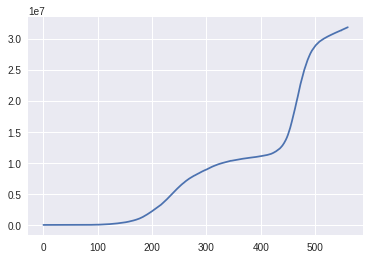

In [54]:
plt.plot(india_cases_confirmed)
plt.show()

**Dispalying the total confirmed cases in india**

In [55]:
print("Total confirmed cases in india:",india_cases_confirmed[len(india_cases_confirmed)-1])

Total confirmed cases in india: 31812114


**Displaying the total recovered cases in india**

In [56]:
result=0
for i in india_cases_recovered:
  if i!=0:
    result=i
print("Total recovered cases in india:",result)

Total recovered cases in india: 30974748


**Displaying the total death cases in india**

In [57]:
print("Total death cases in india:",india_cases_deaths[len(india_cases_deaths)-1])

Total death cases in india: 426290


**Displaying the total active cases in india**

In [58]:
print("Total active cases in india:",india_cases_active[len(india_cases_active)-1])

Total active cases in india: 411076


**Displaying the change of cases per day**

In [59]:
increase_cases_per_day(india_cases_confirmed)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 23,
 2,
 1,
 3,
 5,
 4,
 13,
 6,
 11,
 9,
 20,
 11,
 6,
 23,
 14,
 38,
 50,
 86,
 66,
 103,
 37,
 121,
 70,
 160,
 100,
 37,
 227,
 146,
 601,
 545,
 24,
 515,
 506,
 1190,
 533,
 605,
 809,
 873,
 848,
 759,
 1248,
 1034,
 835,
 1108,
 922,
 1370,
 1893,
 924,
 1541,
 1290,
 1707,
 1453,
 1753,
 1607,
 1561,
 1873,
 1738,
 1801,
 2394,
 2442,
 2806,
 3932,
 2963,
 3587,
 3364,
 3344,
 3113,
 4353,
 3607,
 3524,
 3763,
 3942,
 3787,
 4864,
 5050,
 4630,
 6147,
 5553,
 6198,
 6568,
 6629,
 7113,
 6414,
 5843,
 7293,
 7300,
 8105,
 8336,
 8782,
 7761,
 8821,
 9633,
 9889,
 9471,
 10438,
 10864,
 8442,
 10218,
 10459,
 10930,
 11458,
 11929,
 11502,
 10667,
 10974,
 12881,
 13586,
 14516,
 15403,
 14831,
 14933,
 15968,
 16922,
 17296,
 18552,
 19906,
 19459,
 18522,
 18641,
 19160,
 20903,
 22771,
 24850,
 24248,
 22251,


**convert all the dates and cases in the form of np array and reshape function in np module is used to change the coulmn to respective shape**

In [60]:

days = np.array([i for i in range(len(dates))]).reshape(-1, 1)
total_confirmed = np.array(total_confirmed).reshape(-1, 1)
total_death = np.array(total_death).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

**Displaying the numbers assigned to dates**

In [61]:
days

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

**Plotting the graph for confirmed cases**

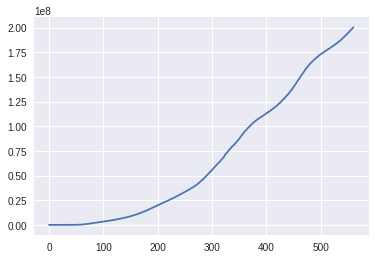

In [62]:
plt.plot(days,total_confirmed)
plt.show()

**Plotting the graph for death cases**

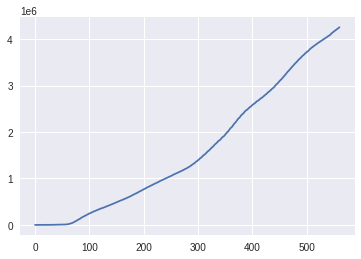

In [63]:
plt.plot(days,total_death)
plt.show()

**Plotting the graph for recovered cases**

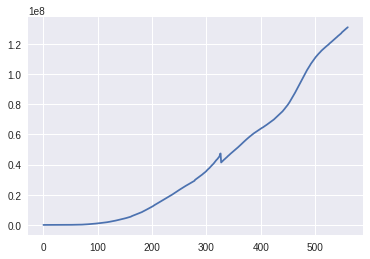

In [64]:
plt.plot(days,total_recovered)
plt.show()

**Plotting the mortality_rate graph**

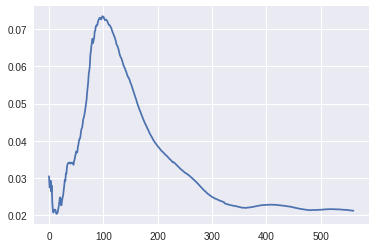

In [65]:
plt.plot(days,mortality_rate)
plt.show()

In [66]:
total_confirmed

array([[      557],
       [      655],
       [      941],
       [     1434],
       [     2118],
       [     2927],
       [     5578],
       [     6167],
       [     8235],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23898],
       [    27643],
       [    30805],
       [    34399],
       [    37130],
       [    40161],
       [    42769],
       [    44811],
       [    45229],
       [    60381],
       [    66909],
       [    69052],
       [    71235],
       [    73270],
       [    75152],
       [    75652],
       [    76212],
       [    76841],
       [    78602],
       [    78982],
       [    79550],
       [    80404],
       [    81381],
       [    82740],
       [    84128],
       [    86022],
       [    88400],
       [    90379],
       [    92980],
       [    95282],
       [    98100],
       [   102016],
       [   106113],
       [   110051],
       [   114230],
       [   119055],
       [   126717],


**we are predicting the values for next ten days and adding the last ten days to the total number of days we have**

In [67]:

days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

**Displaying the future_forecast after adding the ten days**

In [68]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

**converting all integers to the date time for better visualization**

In [69]:

import datetime
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
future_forecast_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

**Displaying the lastest cases in all aspects**

In [70]:
latest_confirmed=covid_confirmed_cases[dates[-1]]
latest_deaths=covid_death_cases[dates[-1]]
latest_recoveries=covid_recovered_cases[dates[-1]]

In [71]:
latest_confirmed

0      148933
1      133310
2      176724
3       14797
4       43158
        ...  
274    181756
275    317404
276      7096
277    197791
278    113526
Name: 8/4/21, Length: 279, dtype: int64

In [72]:
latest_deaths

0      6836
1      2457
2      4404
3       128
4      1026
       ... 
274    2327
275    3609
276    1380
277    3430
278    3711
Name: 8/4/21, Length: 279, dtype: int64

In [73]:
latest_recoveries

0       82586
1      130314
2      118409
3       14380
4       39582
        ...  
259     54332
260    312320
261      4251
262    189658
263     82994
Name: 8/4/21, Length: 264, dtype: int64

**Finding the unique countries**

In [74]:
unique_countries=list(covid_confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

**Splitting the dataset to train and test data**

In [75]:
from sklearn.model_selection import train_test_split
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days,total_confirmed, test_size=0.3, random_state=1)
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(days, total_death, test_size=0.3, random_state=1)
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(days, total_recovered, test_size=0.16, random_state=1)


**Linear Regression for confirmed cases**

In [76]:

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('r^2 score:',r2_score(test_linear_pred,y_test_confirmed))
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))
print("RMSE",np.sqrt(mean_squared_error(test_linear_pred, y_test_confirmed)))

r^2 score: 0.6869123252277889
MAE: 22190136.762368463
MSE: 667368273071669.4
RMSE 25833471.95155288


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Text(0, 0.5, 'Number of comfired cases')

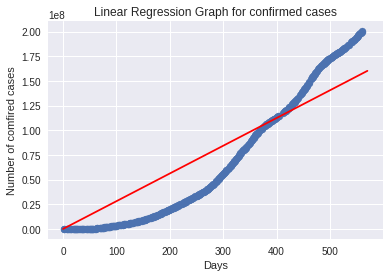

In [77]:
plt.scatter(X_train_confirmed,y_train_confirmed)
plt.plot(future_forecast,linear_pred,color="red")
plt.title("Linear Regression Graph for confirmed cases")
plt.xlabel("Days")
plt.ylabel("Number of comfired cases")

In [78]:
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-10:], 'Predicted number of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
poly_df

,Date,Predicted number of Confirmed Cases Worldwide
0,08/05/2021,157650051.0
1,08/06/2021,157931067.0
2,08/07/2021,158212083.0
3,08/08/2021,158493099.0
4,08/09/2021,158774115.0
5,08/10/2021,159055131.0
6,08/11/2021,159336148.0
7,08/12/2021,159617164.0
8,08/13/2021,159898180.0
9,08/14/2021,160179196.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


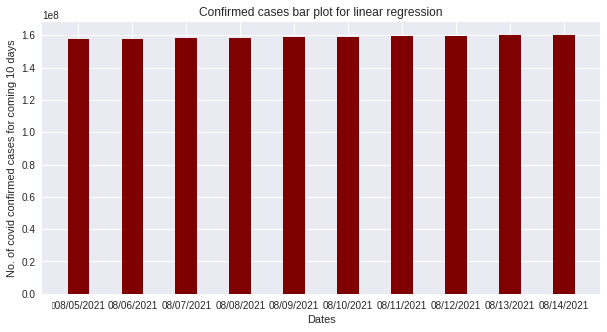

In [79]:
data = {'	08/05/2021':157650051.0, '08/06/2021':157931067.0, '08/07/2021':158212083.0,
        '08/08/2021':158493099.0,'08/09/2021':158774115.0,'08/10/2021':159055131.0,'08/11/2021':159336148.0,'08/12/2021':159617164.0,'08/13/2021':159898180.0,'08/14/2021':160179196.0}
dates = list(data.keys())
confirmed_cases = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dates, confirmed_cases, color ='maroon',
        width = 0.4)
 
plt.xlabel("Dates")
plt.ylabel("No. of covid confirmed cases for coming 10 days")
plt.title("Confirmed cases bar plot for linear regression")
plt.show()

**Model predicted values**

In [80]:
test_linear_pred

array([[1.32077583e+07],
       [1.23366083e+08],
       [6.26665977e+07],
       [1.47252454e+08],
       [1.19993889e+08],
       [9.97607273e+07],
       [6.66008236e+07],
       [4.83347749e+07],
       [2.38863713e+07],
       [1.49500583e+08],
       [8.85200820e+07],
       [1.34044696e+08],
       [4.86157911e+07],
       [8.73960175e+07],
       [1.24490147e+08],
       [1.14935599e+08],
       [1.28986405e+08],
       [3.00687263e+07],
       [1.42475180e+08],
       [6.01374525e+07],
       [8.62719529e+07],
       [9.69505660e+07],
       [1.14654582e+08],
       [4.10283555e+07],
       [1.29829454e+08],
       [2.52914520e+07],
       [3.37219360e+07],
       [4.77727427e+06],
       [8.17756948e+07],
       [6.99730172e+07],
       [1.28705389e+08],
       [1.50905664e+08],
       [5.25500169e+07],
       [6.94109849e+07],
       [1.15216615e+07],
       [6.80059043e+07],
       [1.05381050e+08],
       [1.50624647e+08],
       [8.43048400e+07],
       [4.41195329e+07],


In [81]:
linear_pred

array([0.00000000e+00, 2.81016133e+05, 5.62032267e+05, 8.43048400e+05,
       1.12406453e+06, 1.40508067e+06, 1.68609680e+06, 1.96711293e+06,
       2.24812907e+06, 2.52914520e+06, 2.81016133e+06, 3.09117747e+06,
       3.37219360e+06, 3.65320973e+06, 3.93422587e+06, 4.21524200e+06,
       4.49625813e+06, 4.77727427e+06, 5.05829040e+06, 5.33930653e+06,
       5.62032267e+06, 5.90133880e+06, 6.18235493e+06, 6.46337107e+06,
       6.74438720e+06, 7.02540333e+06, 7.30641947e+06, 7.58743560e+06,
       7.86845173e+06, 8.14946787e+06, 8.43048400e+06, 8.71150013e+06,
       8.99251627e+06, 9.27353240e+06, 9.55454853e+06, 9.83556467e+06,
       1.01165808e+07, 1.03975969e+07, 1.06786131e+07, 1.09596292e+07,
       1.12406453e+07, 1.15216615e+07, 1.18026776e+07, 1.20836937e+07,
       1.23647099e+07, 1.26457260e+07, 1.29267421e+07, 1.32077583e+07,
       1.34887744e+07, 1.37697905e+07, 1.40508067e+07, 1.43318228e+07,
       1.46128389e+07, 1.48938551e+07, 1.51748712e+07, 1.54558873e+07,
      

**Linear Regression for death cases**

In [82]:
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_death, y_train_death)
test_linear_pred = linear_model.predict(X_test_death)
linear_pred = linear_model.predict(future_forecast)
print('r^2 score:',r2_score(test_linear_pred,y_test_death))
print('MAE:', mean_absolute_error(test_linear_pred, y_test_death))
print('MSE:',mean_squared_error(test_linear_pred, y_test_death))
print('RMSE:',np.sqrt(mean_squared_error(test_linear_pred,y_test_death)))

r^2 score: 0.9578131993536289
MAE: 228098.2078613101
MSE: 76379467305.60484
RMSE: 276368.3543852386


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


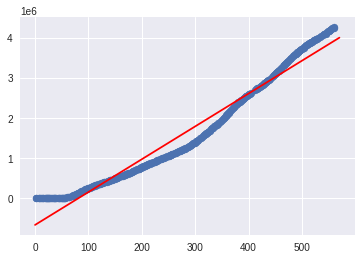

In [83]:
plt.scatter(X_train_death,y_train_death)
plt.plot(future_forecast,linear_pred,color="red")


In [84]:
linear_pred

array([[-6.71365327e+05],
       [-6.63175372e+05],
       [-6.54985418e+05],
       [-6.46795464e+05],
       [-6.38605509e+05],
       [-6.30415555e+05],
       [-6.22225601e+05],
       [-6.14035646e+05],
       [-6.05845692e+05],
       [-5.97655738e+05],
       [-5.89465784e+05],
       [-5.81275829e+05],
       [-5.73085875e+05],
       [-5.64895921e+05],
       [-5.56705966e+05],
       [-5.48516012e+05],
       [-5.40326058e+05],
       [-5.32136103e+05],
       [-5.23946149e+05],
       [-5.15756195e+05],
       [-5.07566240e+05],
       [-4.99376286e+05],
       [-4.91186332e+05],
       [-4.82996378e+05],
       [-4.74806423e+05],
       [-4.66616469e+05],
       [-4.58426515e+05],
       [-4.50236560e+05],
       [-4.42046606e+05],
       [-4.33856652e+05],
       [-4.25666697e+05],
       [-4.17476743e+05],
       [-4.09286789e+05],
       [-4.01096835e+05],
       [-3.92906880e+05],
       [-3.84716926e+05],
       [-3.76526972e+05],
       [-3.68337017e+05],
       [-3.6

In [85]:
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-10:], 'Predicted number of Death Cases Worldwide': np.round(linear_pred[-10:])})
poly_df

,Date,Predicted number of Death Cases Worldwide
0,08/05/2021,3923199.0
1,08/06/2021,3931389.0
2,08/07/2021,3939579.0
3,08/08/2021,3947769.0
4,08/09/2021,3955959.0
5,08/10/2021,3964149.0
6,08/11/2021,3972339.0
7,08/12/2021,3980529.0
8,08/13/2021,3988719.0
9,08/14/2021,3996909.0


In [86]:
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_recovered, y_train_recovered)
test_linear_pred = linear_model.predict(X_test_recovered)
linear_pred = linear_model.predict(future_forecast)
print('r^2 score:',r2_score(test_linear_pred,y_test_recovered))
print('MAE:', mean_absolute_error(test_linear_pred, y_test_recovered))
print('MSE:',mean_squared_error(test_linear_pred, y_test_recovered))
print("RMSE:",np.sqrt(mean_squared_error(test_linear_pred, y_test_recovered)))

r^2 score: 0.9057348208475138
MAE: 10672646.182345342
MSE: 146125183059281.38
RMSE: 12088224.975540511


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


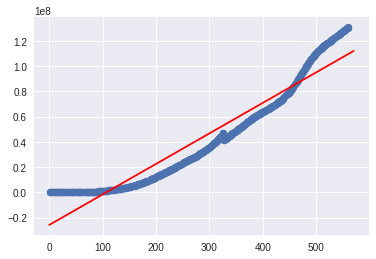

In [87]:
plt.scatter(X_train_recovered,y_train_recovered)
plt.plot(future_forecast,linear_pred,color="red")

In [88]:
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-10:], 'Predicted number of Recovered Cases Worldwide': np.round(linear_pred[-10:])})
poly_df

,Date,Predicted number of Recovered Cases Worldwide
0,08/05/2021,109938148.0
1,08/06/2021,110180190.0
2,08/07/2021,110422232.0
3,08/08/2021,110664273.0
4,08/09/2021,110906315.0
5,08/10/2021,111148357.0
6,08/11/2021,111390399.0
7,08/12/2021,111632440.0
8,08/13/2021,111874482.0
9,08/14/2021,112116524.0


In [89]:
from sklearn.svm import SVR
from sklearn import svm

In [90]:
svm_confirmed = SVR(kernel="poly",shrinking=False,gamma=0.1,epsilon=0.01,C=0.01)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred_confirmed = svm_confirmed.predict(future_forecast)
svm_test_pred_confirmed = svm_confirmed.predict(X_test_confirmed)
print('r^2 score:',r2_score(svm_test_pred_confirmed, y_test_confirmed))
print('MAE:', mean_absolute_error(svm_test_pred_confirmed, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred_confirmed, y_test_confirmed))
print('RMSE:',np.sqrt(mean_squared_error(svm_test_pred_confirmed, y_test_confirmed)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r^2 score: 0.952990148907523
MAE: 10876433.603003273
MSE: 236919966955800.8
RMSE: 15392204.746422809


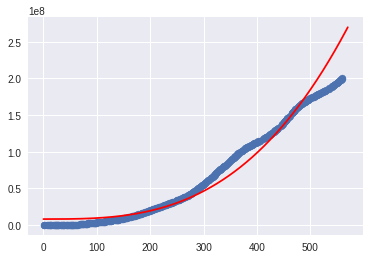

In [91]:
plt.scatter(X_train_confirmed,y_train_confirmed)
plt.plot(future_forecast,svm_pred_confirmed,color="red")

In [92]:
svm_pred_confirmed= svm_pred_confirmed.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-10:], 'Predicted number of Confirmed Cases Worldwide': np.round(svm_pred_confirmed[-10:])})
poly_df

,Date,Predicted number of Confirmed Cases Worldwide
0,08/05/2021,257735374.0
1,08/06/2021,259073418.0
2,08/07/2021,260416232.0
3,08/08/2021,261763825.0
4,08/09/2021,263116205.0
5,08/10/2021,264473381.0
6,08/11/2021,265835360.0
7,08/12/2021,267202153.0
8,08/13/2021,268573766.0
9,08/14/2021,269950210.0


In [93]:
svm_confirmed

SVR(C=0.01, epsilon=0.01, gamma=0.1, kernel='poly', shrinking=False)

In [94]:
svm_pred_confirmed

array([7.96665394e+06, 7.96665535e+06, 7.96666525e+06, 7.96669213e+06,
       7.96674447e+06, 7.96683077e+06, 7.96695950e+06, 7.96713916e+06,
       7.96737824e+06, 7.96768522e+06, 7.96806859e+06, 7.96853684e+06,
       7.96909845e+06, 7.96976192e+06, 7.97053574e+06, 7.97142838e+06,
       7.97244835e+06, 7.97360412e+06, 7.97490418e+06, 7.97635703e+06,
       7.97797115e+06, 7.97975502e+06, 7.98171714e+06, 7.98386600e+06,
       7.98621008e+06, 7.98875787e+06, 7.99151785e+06, 7.99449852e+06,
       7.99770837e+06, 8.00115587e+06, 8.00484953e+06, 8.00879782e+06,
       8.01300924e+06, 8.01749227e+06, 8.02225540e+06, 8.02730712e+06,
       8.03265592e+06, 8.03831028e+06, 8.04427869e+06, 8.05056965e+06,
       8.05719163e+06, 8.06415313e+06, 8.07146264e+06, 8.07912863e+06,
       8.08715961e+06, 8.09556405e+06, 8.10435045e+06, 8.11352730e+06,
       8.12310307e+06, 8.13308627e+06, 8.14348537e+06, 8.15430887e+06,
       8.16556525e+06, 8.17726301e+06, 8.18941062e+06, 8.20201658e+06,
      

In [95]:
svm_death = SVR(kernel="poly",shrinking=True,gamma=0.1,epsilon=0.01,C=0.01)
svm_death.fit(X_train_death, y_train_death)
svm_pred_death = svm_death.predict(future_forecast)
svm_test_pred_death = svm_death.predict(X_test_death)
print('r^2 score:',r2_score(svm_test_pred_death, y_test_death))
print('MAE:', mean_absolute_error(svm_test_pred_death, y_test_death))
print('MSE:',mean_squared_error(svm_test_pred_death, y_test_death))
print("RMSE:",np.sqrt(mean_squared_error(svm_test_pred_death, y_test_death)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r^2 score: 0.9366092203945575
MAE: 273046.01250243187
MSE: 116203879986.24411
RMSE: 340886.9020455965


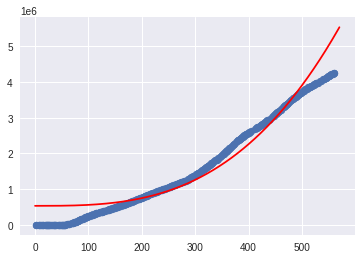

In [96]:
plt.scatter(X_train_death,y_train_death)
plt.plot(future_forecast,svm_pred_death,color="red")

In [97]:
svm_pred_death

array([ 533651.60166388,  533651.62864378,  533651.81750308,
        533652.33012119,  533653.3283775 ,  533654.97415141,
        533657.42932233,  533660.85576966,  533665.4153728 ,
        533671.27001115,  533678.58156412,  533687.51191109,
        533698.22293145,  533710.87650468,  533725.63451013,
        533742.65882713,  533762.11133521,  533784.15391374,
        533808.94844202,  533836.65679956,  533867.44086578,
        533901.4625199 ,  533938.88364157,  533979.86610999,
        534024.57180446,  534073.16260494,  534125.8003903 ,
        534182.64704002,  534243.86443388,  534309.61445052,
        534380.05896985,  534455.35987151,  534535.67903453,
        534621.17833847,  534712.01966272,  534808.36488639,
        534910.37588897,  535018.2145506 ,  535132.04274928,
        535252.02236581,  535378.31527908,  535511.08336752,
        535650.48851205,  535796.69259179,  535949.8574854 ,
        536110.14507232,  536277.71723272,  536452.73584461,
        536635.36278855,

In [98]:
svm_pred_death= svm_pred_death.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-10:], 'Predicted number of Death Cases Worldwide': np.round(svm_pred_death[-10:])})
poly_df

,Date,Predicted number of Death Cases Worldwide
0,08/05/2021,5297182.0
1,08/06/2021,5322701.0
2,08/07/2021,5348310.0
3,08/08/2021,5374011.0
4,08/09/2021,5399804.0
5,08/10/2021,5425687.0
6,08/11/2021,5451663.0
7,08/12/2021,5477730.0
8,08/13/2021,5503889.0
9,08/14/2021,5530140.0


In [99]:
svm_recovered = SVR(kernel="poly",shrinking=True,gamma=0.1,epsilon=0.01,C=0.01)
svm_recovered.fit(X_train_recovered, y_train_recovered)
svm_pred_recovered = svm_recovered.predict(future_forecast)
svm_test_pred_recovered = svm_recovered.predict(X_test_recovered)
print('r^2 score:',r2_score(svm_test_pred_recovered, y_test_recovered))
print('MAE:', mean_absolute_error(svm_test_pred_recovered, y_test_recovered))
print('MSE:',mean_squared_error(svm_test_pred_recovered, y_test_recovered))
print('RMSE:',np.sqrt(mean_squared_error(svm_test_pred_recovered, y_test_recovered)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r^2 score: 0.9745623921706426
MAE: 5491320.024561624
MSE: 49091184172999.53
RMSE: 7006510.127945262


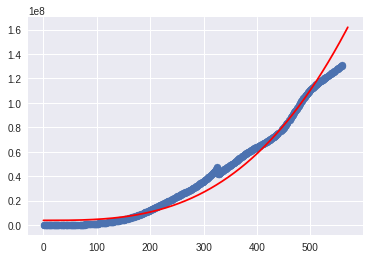

In [100]:
plt.scatter(X_train_recovered,y_train_recovered)
plt.plot(future_forecast,svm_pred_recovered,color="red")

In [101]:
svm_pred_recovered= svm_pred_recovered.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-10:], 'Predicted number of Death Cases Worldwide': np.round(svm_pred_recovered[-10:])})
poly_df

,Date,Predicted number of Death Cases Worldwide
0,08/05/2021,154579082.0
1,08/06/2021,155387207.0
2,08/07/2021,156198212.0
3,08/08/2021,157012104.0
4,08/09/2021,157828888.0
5,08/10/2021,158648567.0
6,08/11/2021,159471149.0
7,08/12/2021,160296636.0
8,08/13/2021,161125036.0
9,08/14/2021,161956353.0


In [102]:
from sklearn import linear_model
lasso_confirmed = linear_model.Lasso(alpha=0.1)
lasso_confirmed.fit(X_train_confirmed, y_train_confirmed)
lasso_pred_confirmed = lasso_confirmed.predict(future_forecast)
lasso_test_pred_confirmed = lasso_confirmed.predict(X_test_confirmed)
print('r^2 score:',r2_score(lasso_test_pred_confirmed, y_test_confirmed))
print('MAE:', mean_absolute_error(lasso_test_pred_confirmed, y_test_confirmed))
print('MSE:',mean_squared_error(lasso_test_pred_confirmed, y_test_confirmed))
print('RMSE:',np.sqrt(mean_squared_error(lasso_test_pred_confirmed, y_test_confirmed)))

r^2 score: 0.9255151919625304
MAE: 14638369.984918121
MSE: 309055201806531.56
RMSE: 17579965.921654444


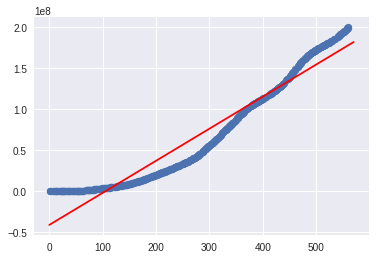

In [103]:
plt.scatter(X_train_confirmed,y_train_confirmed)
plt.plot(future_forecast,lasso_pred_confirmed,color="red")

In [104]:
lasso_pred_confirmed= lasso_pred_confirmed.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-10:], 'Predicted number of Confirmed Cases Worldwide': np.round(lasso_pred_confirmed[-10:])})
poly_df

,Date,Predicted number of Confirmed Cases Worldwide
0,08/05/2021,178721586.0
1,08/06/2021,179113657.0
2,08/07/2021,179505729.0
3,08/08/2021,179897801.0
4,08/09/2021,180289873.0
5,08/10/2021,180681945.0
6,08/11/2021,181074016.0
7,08/12/2021,181466088.0
8,08/13/2021,181858160.0
9,08/14/2021,182250232.0


In [105]:
lasso_death = linear_model.Lasso(alpha=0.1)
lasso_death.fit(X_train_death, y_train_death)
lasso_pred_death = lasso_death.predict(future_forecast)
lasso_test_pred_death = lasso_death.predict(X_test_death)
print('r^2 score:',r2_score(lasso_test_pred_death, y_test_death))
print('MAE:', mean_absolute_error(lasso_test_pred_death, y_test_death))
print('MSE:',mean_squared_error(lasso_test_pred_death, y_test_death))
print('RMSE:',np.sqrt(mean_squared_error(lasso_test_pred_death, y_test_death)))

r^2 score: 0.9578131993284725
MAE: 228098.2078595165
MSE: 76379467279.09668
RMSE: 276368.3543372806


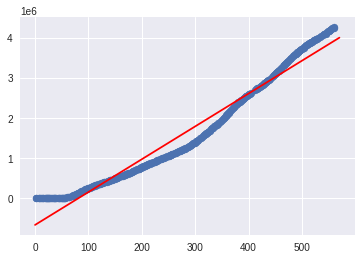

In [106]:
plt.scatter(X_train_death,y_train_death)
plt.plot(future_forecast,lasso_pred_death,color="red")

In [107]:
lasso_pred_death= lasso_pred_death.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-10:], 'Predicted number of Death Cases Worldwide': np.round(lasso_pred_death[-10:])})
poly_df

,Date,Predicted number of Death Cases Worldwide
0,08/05/2021,3923199.0
1,08/06/2021,3931389.0
2,08/07/2021,3939579.0
3,08/08/2021,3947769.0
4,08/09/2021,3955959.0
5,08/10/2021,3964149.0
6,08/11/2021,3972339.0
7,08/12/2021,3980529.0
8,08/13/2021,3988719.0
9,08/14/2021,3996909.0


In [108]:
lasso_recovered = linear_model.Lasso(alpha=0.1)
lasso_recovered.fit(X_train_recovered, y_train_recovered)
lasso_pred_recovered = lasso_recovered.predict(future_forecast)
lasso_test_pred_recovered = lasso_recovered.predict(X_test_recovered)
print('r^2 score:',r2_score(lasso_test_pred_recovered, y_test_recovered))
print('MAE:', mean_absolute_error(lasso_test_pred_recovered, y_test_recovered))
print('MSE:',mean_squared_error(lasso_test_pred_recovered, y_test_recovered))
print('RMSE:',np.sqrt(mean_squared_error(lasso_test_pred_recovered,y_test_recovered)))

r^2 score: 0.9057348208448335
MAE: 10672646.182270605
MSE: 146125183058823.78
RMSE: 12088224.975521583


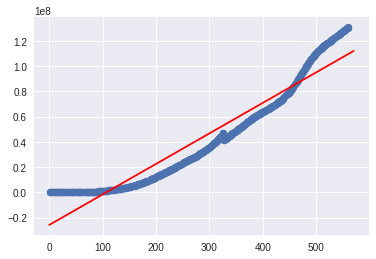

In [109]:
plt.scatter(X_train_recovered,y_train_recovered)
plt.plot(future_forecast,lasso_pred_recovered,color="red")

In [110]:
lasso_pred_recovered= lasso_pred_recovered.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-10:], 'Predicted number of Recovered Cases Worldwide': np.round(lasso_pred_recovered[-10:])})
poly_df

,Date,Predicted number of Recovered Cases Worldwide
0,08/05/2021,109938148.0
1,08/06/2021,110180190.0
2,08/07/2021,110422232.0
3,08/08/2021,110664273.0
4,08/09/2021,110906315.0
5,08/10/2021,111148357.0
6,08/11/2021,111390399.0
7,08/12/2021,111632440.0
8,08/13/2021,111874482.0
9,08/14/2021,112116524.0


In [111]:
lasso_pred_recovered

array([-2.58472748e+07, -2.56052331e+07, -2.53631913e+07, -2.51211496e+07,
       -2.48791078e+07, -2.46370661e+07, -2.43950243e+07, -2.41529826e+07,
       -2.39109408e+07, -2.36688990e+07, -2.34268573e+07, -2.31848155e+07,
       -2.29427738e+07, -2.27007320e+07, -2.24586903e+07, -2.22166485e+07,
       -2.19746068e+07, -2.17325650e+07, -2.14905233e+07, -2.12484815e+07,
       -2.10064398e+07, -2.07643980e+07, -2.05223563e+07, -2.02803145e+07,
       -2.00382728e+07, -1.97962310e+07, -1.95541893e+07, -1.93121475e+07,
       -1.90701058e+07, -1.88280640e+07, -1.85860223e+07, -1.83439805e+07,
       -1.81019388e+07, -1.78598970e+07, -1.76178552e+07, -1.73758135e+07,
       -1.71337717e+07, -1.68917300e+07, -1.66496882e+07, -1.64076465e+07,
       -1.61656047e+07, -1.59235630e+07, -1.56815212e+07, -1.54394795e+07,
       -1.51974377e+07, -1.49553960e+07, -1.47133542e+07, -1.44713125e+07,
       -1.42292707e+07, -1.39872290e+07, -1.37451872e+07, -1.35031455e+07,
       -1.32611037e+07, -

In [112]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [128]:
covid_confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,113124,114220,115751,117158,118659,120216,122156,123485,124748,125937,127464,129021,130113,131586,132777,133578,134653,135889,136643,137853,139051,140224,140602,141499,142414,142762,143183,143439,143666,143871,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665,132686,132697,132740,132763,132797,132828,132853,132875,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210,153309,154486,155784,157005,158213,159563,160868,162155,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273,14273,14359,14379,14379,14464,14498,14498,14498,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707,40805,40906,41061,41227,41405,41629,41736,41780,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,15325,15740,16136,16507,17052,17727,18121,19310,20261,21312,22341,23385,24810,26608,28470,30478,32665,35409,38239,42288,46292,51002,55845,60180,65607,71144,78269,86957,94913,101173,106347,117121,123640,133405,141122,150060,157507,157507,174461,181756
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,313520,313721,313851,313851,314167,314288,314409,314492,314569,314569,314780,314869,314869,315047,315107,315160,315224,315224,315409,315504,315504,315641,315641,315761,315761,315876,315876,315968,315968,316088,316088,316189,316328,316487,316603,316738,316861,317083,317264,317404
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6906,6908,6909,6918,6920,6923,6924,6926,6929,6929,6931,6934,6936,6940,6941,6948,6952,6961,6964,6967,6972,6977,6981,6987,6992,6997,7001,7003,7008,7012,7012,7022,7027,7042,7058,7061,7070,7081,7086,7096
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [129]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,113124,114220,115751,117158,118659,120216,122156,123485,124748,125937,127464,129021,130113,131586,132777,133578,134653,135889,136643,137853,139051,140224,140602,141499,142414,142762,143183,143439,143666,143871,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665,132686,132697,132740,132763,132797,132828,132853,132875,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210,153309,154486,155784,157005,158213,159563,160868,162155,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273,14273,14359,14379,14379,14464,14498,14498,14498,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707,40805,40906,41061,41227,41405,41629,41736,41780,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,15325,15740,16136,16507,17052,17727,18121,19310,20261,21312,22341,23385,24810,26608,28470,30478,32665,35409,38239,42288,46292,51002,55845,60180,65607,71144,78269,86957,94913,101173,106347,117121,123640,133405,141122,150060,157507,157507,174461,181756
275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,313520,313721,313851,313851,314167,314288,314409,314492,314569,314569,314780,314869,314869,315047,315107,315160,315224,315224,315409,315504,315504,315641,315641,315761,315761,315876,315876,315968,315968,316088,316088,316189,316328,316487,316603,316738,316861,317083,317264,317404
276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6906,6908,6909,6918,6920,6923,6924,6926,6929,6929,6931,6934,6936,6940,6941,6948,6952,6961,6964,6967,6972,6977,6981,6987,6992,6997,7001,7003,7008,7012,7012,7022,7027,7042,7058,7061,7070,7081,7086,7096
277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,146031,148568,149661,152056,154948,157832,160613,162487,164282,165513,167132,169003,170456,172405,174789,175729,176742,178748,180549,182129,183344,184672,185649,186279,187602,188573,189731,190

In [130]:
covid_confirmed_cases.drop(['Province/State','Country/Region','Lat','Long'],inplace=True,axis=1)
covid_confirmed = covid_confirmed_cases.T
covid_confirmed.index.name = "Date"
col = covid_confirmed.columns.tolist()
covid_confirmed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/31/21,147154,133081,171392,14678,42777,1303,4929764,230110,124,9153,199,1809,859,234,20948,1057,659056,343849,14840,269186,1249484,4390,446040,1124715,14163,8394,2515,473506,205655,106690,19917855,337,425054,13573,299185,7080,33791,77243,82064,234295,...,37138,246,25351,1100040,717665,25963,15674,15482,1017,597287,10898,15798,38811,589565,5727045,35037755,93927,2333409,680858,113,2553,2500,643,9214,63,4965,4333,21,4,2484,5856528,381517,129327,4,305766,150060,316738,7061,195816,108860
8/1/21,147501,133121,172564,14678,42815,1303,4935847,230339,124,9360,200,1824,862,234,20950,1058,659508,344520,14840,269303,1264328,4407,446998,1124715,14163,8394,2518,473899,205655,106690,19938358,337,425148,13588,302665,7080,33822,77914,82064,234295,...,37138,264,25402,1100040,717665,25983,15688,15550,1017,615314,10966,15870,38930,595532,5747935,35079208,94195,2334433,682377,113,2568,2500,643,9216,63,4980,4333,21,4,2486,5880667,381569,130216,4,306673,157507,316861,7070,196293,109546
8/2/21,147985,133146,173922,14747,42970,1303,4947030,230476,124,9562,200,1840,863,234,20955,1058,659872,344951,14840,269401,1280317,4417,447754,1129018,14163,8394,2524,474538,205785,115220,19953501,338,425541,13591,306354,7505,33830,78474,82064,234295,...,37138,281,25439,1100040,719684,26005,15702,15619,1017,633284,10982,15924,39039,596775,5770833,35199930,94425,2335237,683914,113,2568,2500,644,9216,63,5000,4912,21,4,2486,5902354,381715,131079,4,307570,157507,317083,7081,196490,110855


In [131]:
cumulative_sum = covid_confirmed_cases.sum()
cumulative_sum

Date
1/22/20          557
1/23/20          655
1/24/20          941
1/25/20         1434
1/26/20         2118
             ...    
7/31/21    197937378
8/1/21     198417225
8/2/21     198995708
8/3/21     199632581
8/4/21     200307948
Length: 561, dtype: int64

In [132]:
covid_confirmed.index = pd.to_datetime(covid_confirmed.index)
covid_confirmed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,147154,133081,171392,14678,42777,1303,4929764,230110,124,9153,199,1809,859,234,20948,1057,659056,343849,14840,269186,1249484,4390,446040,1124715,14163,8394,2515,473506,205655,106690,19917855,337,425054,13573,299185,7080,33791,77243,82064,234295,...,37138,246,25351,1100040,717665,25963,15674,15482,1017,597287,10898,15798,38811,589565,5727045,35037755,93927,2333409,680858,113,2553,2500,643,9214,63,4965,4333,21,4,2484,5856528,381517,129327,4,305766,150060,316738,7061,195816,108860
2021-08-01,147501,133121,172564,14678,42815,1303,4935847,230339,124,9360,200,1824,862,234,20950,1058,659508,344520,14840,269303,1264328,4407,446998,1124715,14163,8394,2518,473899,205655,106690,19938358,337,425148,13588,302665,7080,33822,77914,82064,234295,...,37138,264,25402,1100040,717665,25983,15688,15550,1017,615314,10966,15870,38930,595532,5747935,35079208,94195,2334433,682377,113,2568,2500,643,9216,63,4980,4333,21,4,2486,5880667,381569,130216,4,306673,157507,316861,7070,196293,109546
2021-08-02,147985,133146,173922,14747,42970,1303,4947030,230476,124,9562,200,1840,863,234,20955,1058,659872,344951,14840,269401,1280317,4417,447754,1129018,14163,8394,2524,474538,205785,115220,19953501,338,425541,13591,306354,7505,33830,78474,82064,234295,...,37138,281,25439,1100040,719684,26005,15702,15619,1017,633284,10982,15924,39039,596775,5770833,35199930,94425,2335237,683914,113,2568,2500,644,9216,63,5000,4912,21,4,2486,5902354,381715,131079,4,307570,157507,317083,7081,196490,110855


In [133]:
covid_confirmed['Confirmed'] = cumulative_sum
covid_confirmed.drop(labels = col,inplace=True,axis = 1)
covid_confirmed

,Confirmed
Date,
2020-01-22,557
2020-01-23,655
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
...,...
2021-07-31,197937378
2021-08-01,198417225
2021-08-02,198995708


In [134]:
train,test = covid_confirmed.iloc[:-30],covid_confirmed.iloc[-30:]

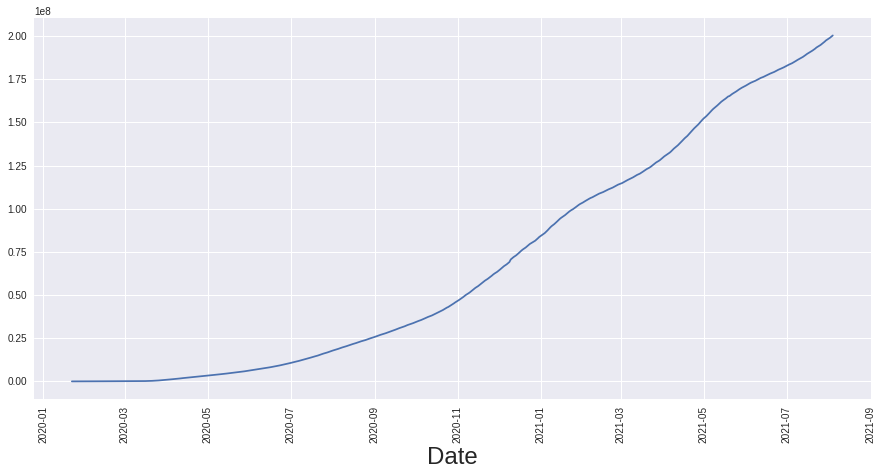

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  531
Model:             ExponentialSmoothing   SSE                  2172559656686.055
Optimized:                         True   AIC                          11774.180
Trend:                         Additive   BIC                          11821.202
Seasonal:                      Additive   AICC                         11774.884
Seasonal Periods:                     7   Date:                 Mon, 27 Dec 2021
Box-Cox:                          False   Time:                         15:45:42
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8652177                alpha                 True
smoothing_slope          

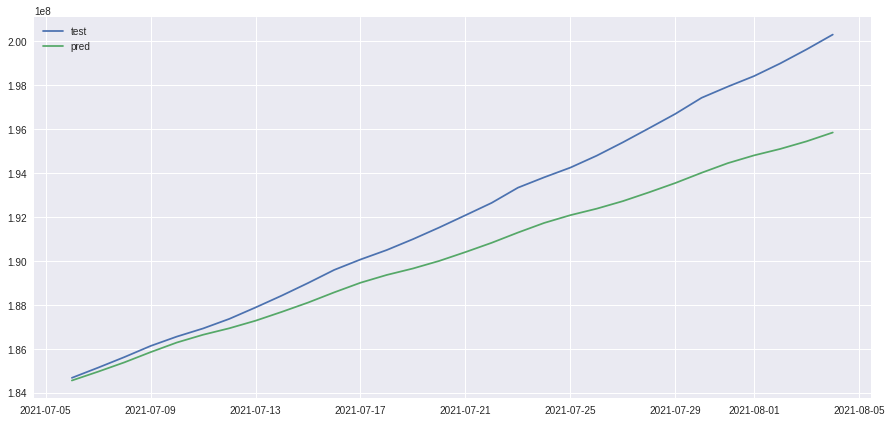

RMSE value : 2236437.483444729
MAE value : 1804317.630407857
r2 value : 0.878106651415056
MSE value : 5001652617356.592


In [135]:
from sklearn import metrics
plt.rcParams['figure.figsize'] = [15,7]
plt.plot(covid_confirmed['Confirmed'])#plt.plot(new_india['Confirmed'].iloc[:10])
plt.xlabel("Date",size=24)
plt.xticks(rotation = 90)
plt.show()
model1 = ExponentialSmoothing(train,trend="add",seasonal="add",seasonal_periods=7).fit()
print(model1.summary())
pred1 = model1.forecast(30)
plt.plot(test,label="test")
plt.plot(pred1,label="pred")
plt.legend(loc="best")
plt.show()
print(f"RMSE value : {np.sqrt(metrics.mean_squared_error(test,pred1))}")
print(f"MAE value : {metrics.mean_absolute_error(test,pred1)}")
print(f"r2 value : {np.sqrt(metrics.r2_score(test,pred1))}")
print(f"MSE value : {metrics.mean_squared_error(test,pred1)}")

In [136]:
pred1

2021-07-06    1.845496e+08
2021-07-07    1.849522e+08
2021-07-08    1.853753e+08
2021-07-09    1.858414e+08
2021-07-10    1.862797e+08
2021-07-11    1.866340e+08
2021-07-12    1.869288e+08
2021-07-13    1.872733e+08
2021-07-14    1.876759e+08
2021-07-15    1.880990e+08
2021-07-16    1.885651e+08
2021-07-17    1.890034e+08
2021-07-18    1.893577e+08
2021-07-19    1.896525e+08
2021-07-20    1.899970e+08
2021-07-21    1.903996e+08
2021-07-22    1.908227e+08
2021-07-23    1.912888e+08
2021-07-24    1.917271e+08
2021-07-25    1.920814e+08
2021-07-26    1.923762e+08
2021-07-27    1.927207e+08
2021-07-28    1.931233e+08
2021-07-29    1.935464e+08
2021-07-30    1.940125e+08
2021-07-31    1.944508e+08
2021-08-01    1.948051e+08
2021-08-02    1.950999e+08
2021-08-03    1.954444e+08
2021-08-04    1.958470e+08
Freq: D, dtype: float64

In [137]:
recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,67483,68288,69205,70016,71012,71924,72700,73635,74480,75314,76218,77280,78521,79446,80226,81077,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129982,129990,129994,130002,130009,130014,130018,130023,130027,130029,130033,130035,130037,130043,130047,130050,130052,130053,130059,130061,130067,130072,130074,130081,130086,130097,130109,130118,130125,130139,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,96108,96335,96572,96815,97089,97380,97701,98031,98387,98748,99101,99510,99931,100383,100911,101430,102010,102594,103192,103809,104397,104992,105604,106337,107041,107776,108537,109349,109951,110577,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13697,13697,13697,13717,13720,13721,13721,13721,13721,13721,13752,13757,13760,13770,13770,13770,13787,13796,13796,13829,13844,13844,13844,13897,13930,13930,13988,13988,13988,13988,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,32696,32791,32819,33079,33242,33271,33375,33514,33669,33739,34019,34047,34100,34169,34298,34327,34357,34500,34584,34620,34724,34732,34755,34790,34857,34893,35082,35284,35423,35474,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,16,16,16,16,...,6137,6319,6519,6764,6840,7247,7395,7643,7819,8022,8077,8557,8950,8984,9204,9275,9331,9553,9624,9688,10020,10312,10667,11047,11443,11971,13421,15536,17583,19342,21344,22946,27457,31780,35484,38734,43157,43157,50831,54332
260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,307236,307618,307892,307892,308186,308303,308413,308550,308774,308774,309059,309251,309251,309543,309689,309910,310027,310027,310239,310329,310329,310525,310525,310601,310601,310961,310961,311380,311380,311526,311526,311560,311622,311714,311772,311832,311918,312149,312289,312320
261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4019,4025,4032,4055,4068,4081,4082,4087,4104,4108,4111,4117,4119,4128,4135,4141,4142,4147,4151,4154,4154,4156,4159,4162,4162,4162,4162,4163,4166,4166,4166,4168,4168,4171,4171,4185,4200,4212,4232,4251
262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,121965,124582,126441,128312,131792,134419,137819,140880,143128,145908,147751,149421,152103,154776,157489,160215,162239,163681,164924,166388,168052,169320,171699,173320,174728,175429,177419,179171,180535,181638,182665,183534,183957,185210,186211,187236,188106,188950,189341,189658


In [138]:
covid_recovered_cases.drop(['Province/State','Country/Region','Lat','Long'],inplace=True,axis=1)
covid_recovered = covid_recovered_cases.T
covid_recovered.index.name = "Date"
col = covid_recovered.columns.tolist()
covid_recovered

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/31/21,82586,130222,115276,14210,37255,1235,4569552,219864,121,0,191,1725,830,221,19967,1038,643027,332926,12606,266796,1078212,4229,440200,0,13420,8136,2374,407932,189369,95323,17771228,280,398545,13369,209512,773,33011,69996,35261,1404107,...,30647,0,21700,0,317600,21987,12856,14556,183,26873,9889,14450,31783,510696,5454360,0,83115,2255695,658198,111,2495,1914,631,6564,63,4471,2225,19,4,2431,0,373481,123164,3,290181,38734,311832,4185,187236,75856
8/1/21,82586,130243,116009,14210,37397,1235,4581132,219986,121,0,191,1727,830,221,19996,1038,643387,333128,12606,266921,1093266,4229,441369,0,13420,8136,2384,408577,189369,95323,17771228,280,398554,13369,213227,773,33036,70754,35261,1404244,...,30647,0,21770,0,317600,21995,12879,14556,183,26873,9911,14493,31941,516831,5459899,0,84052,2256053,659664,111,2499,1914,631,6570,63,4614,2225,19,4,2433,0,373636,123995,3,291556,43157,311918,4200,188106,76665
8/2/21,82586,130256,116770,14296,38360,1235,4594873,220133,121,0,191,1727,831,221,20011,1039,643694,333267,12606,267026,1108748,4251,441961,0,13420,8136,2399,409768,189677,96964,17771228,280,398617,13385,217142,773,33068,71517,35261,1404327,...,30647,0,21829,0,317600,22002,12884,14705,183,26873,9941,14524,32129,521335,5465846,0,84959,2256421,661156,111,2499,1914,635,6570,63,4635,3750,19,4,2433,0,373839,124728,3,292567,43157,312149,4212,188950,79420


In [139]:
cumulative_sum = covid_recovered_cases.sum()
cumulative_sum

Date
1/22/20           30
1/23/20           32
1/24/20           39
1/25/20           42
1/26/20           56
             ...    
7/31/21    129705211
8/1/21     129994389
8/2/21     130277533
8/3/21     130582001
8/4/21     130899061
Length: 561, dtype: int64

In [140]:
covid_recovered.index = pd.to_datetime(covid_recovered.index)
covid_recovered

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,82586,130222,115276,14210,37255,1235,4569552,219864,121,0,191,1725,830,221,19967,1038,643027,332926,12606,266796,1078212,4229,440200,0,13420,8136,2374,407932,189369,95323,17771228,280,398545,13369,209512,773,33011,69996,35261,1404107,...,30647,0,21700,0,317600,21987,12856,14556,183,26873,9889,14450,31783,510696,5454360,0,83115,2255695,658198,111,2495,1914,631,6564,63,4471,2225,19,4,2431,0,373481,123164,3,290181,38734,311832,4185,187236,75856
2021-08-01,82586,130243,116009,14210,37397,1235,4581132,219986,121,0,191,1727,830,221,19996,1038,643387,333128,12606,266921,1093266,4229,441369,0,13420,8136,2384,408577,189369,95323,17771228,280,398554,13369,213227,773,33036,70754,35261,1404244,...,30647,0,21770,0,317600,21995,12879,14556,183,26873,9911,14493,31941,516831,5459899,0,84052,2256053,659664,111,2499,1914,631,6570,63,4614,2225,19,4,2433,0,373636,123995,3,291556,43157,311918,4200,188106,76665
2021-08-02,82586,130256,116770,14296,38360,1235,4594873,220133,121,0,191,1727,831,221,20011,1039,643694,333267,12606,267026,1108748,4251,441961,0,13420,8136,2399,409768,189677,96964,17771228,280,398617,13385,217142,773,33068,71517,35261,1404327,...,30647,0,21829,0,317600,22002,12884,14705,183,26873,9941,14524,32129,521335,5465846,0,84959,2256421,661156,111,2499,1914,635,6570,63,4635,3750,19,4,2433,0,373839,124728,3,292567,43157,312149,4212,188950,79420


In [141]:
covid_recovered['Recovered'] = cumulative_sum
covid_recovered.drop(labels = col,inplace=True,axis = 1)
covid_recovered

,Recovered
Date,
2020-01-22,30
2020-01-23,32
2020-01-24,39
2020-01-25,42
2020-01-26,56
...,...
2021-07-31,129705211
2021-08-01,129994389
2021-08-02,130277533


In [142]:
train,test = covid_recovered.iloc[:-30],covid_recovered.iloc[-30:]

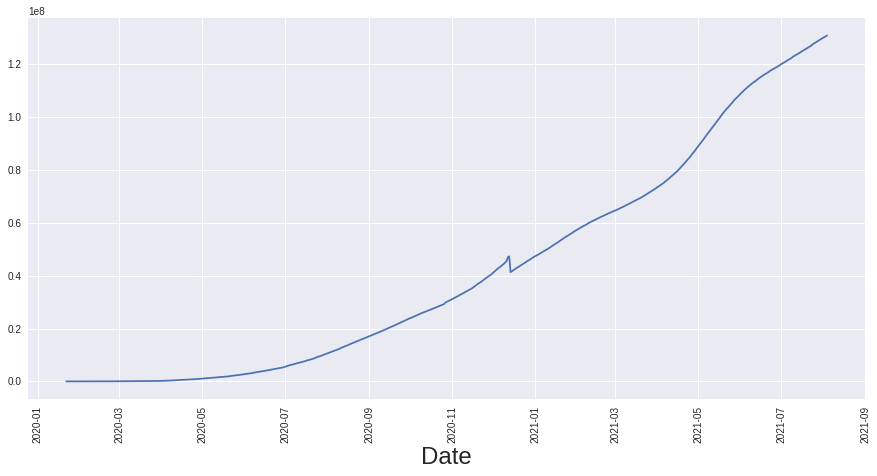

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  531
Model:             ExponentialSmoothing   SSE                 45498121378285.664
Optimized:                         True   AIC                          13389.357
Trend:                         Additive   BIC                          13436.379
Seasonal:                      Additive   AICC                         13390.061
Seasonal Periods:                     7   Date:                 Mon, 27 Dec 2021
Box-Cox:                          False   Time:                         15:45:44
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_slope          

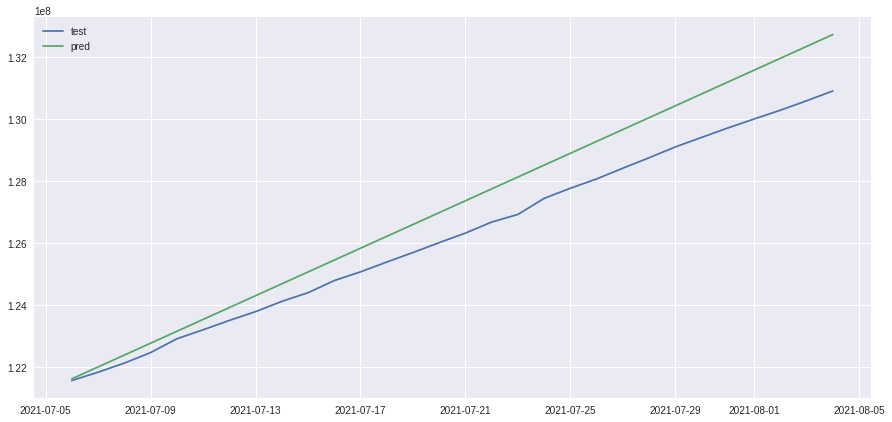

RMSE value : 1055067.7261635198
MAE value : 931515.0354009192
r2 value : 0.9274325766371577
MSE value : 1113167906791.8599


In [143]:
plt.rcParams['figure.figsize'] = [15,7]
plt.plot(covid_recovered['Recovered'])#plt.plot(new_india['Confirmed'].iloc[:10])
plt.xlabel("Date",size=24)
plt.xticks(rotation = 90)
plt.show()
model1 = ExponentialSmoothing(train,trend="add",seasonal="add",seasonal_periods=7).fit()
print(model1.summary())
pred1 = model1.forecast(30)
plt.plot(test,label="test")
plt.plot(pred1,label="pred")
plt.legend(loc="best")
plt.show()
print(f"RMSE value : {np.sqrt(metrics.mean_squared_error(test,pred1))}")
print(f"MAE value : {metrics.mean_absolute_error(test,pred1)}")
print(f"r2 value : {np.sqrt(metrics.r2_score(test,pred1))}")
print(f"MSE value : {metrics.mean_squared_error(test,pred1)}")

In [144]:
pred1

2021-07-06    1.216180e+08
2021-07-07    1.220007e+08
2021-07-08    1.223834e+08
2021-07-09    1.227661e+08
2021-07-10    1.231489e+08
2021-07-11    1.235316e+08
2021-07-12    1.239143e+08
2021-07-13    1.242971e+08
2021-07-14    1.246798e+08
2021-07-15    1.250625e+08
2021-07-16    1.254453e+08
2021-07-17    1.258280e+08
2021-07-18    1.262107e+08
2021-07-19    1.265934e+08
2021-07-20    1.269763e+08
2021-07-21    1.273589e+08
2021-07-22    1.277416e+08
2021-07-23    1.281244e+08
2021-07-24    1.285071e+08
2021-07-25    1.288899e+08
2021-07-26    1.292725e+08
2021-07-27    1.296554e+08
2021-07-28    1.300380e+08
2021-07-29    1.304208e+08
2021-07-30    1.308035e+08
2021-07-31    1.311863e+08
2021-08-01    1.315690e+08
2021-08-02    1.319517e+08
2021-08-03    1.323345e+08
2021-08-04    1.327172e+08
Freq: D, dtype: float64

In [145]:
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4594,4650,4730,4794,4871,4962,5048,5107,5199,5283,5360,5415,5477,5561,5638,5724,5791,5849,5923,5983,6072,6098,6147,6213,6266,6293,6325,6357,6393,6425,6477,6515,6577,6615,6677,6708,6737,6774,6804,6836
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3685,3693,3699,3708,3716,3726,3735,3745,3755,3765,3775,3786,3798,3811,3824,3836,3851,3867,3882,3895,3910,3922,3938,3956,3979,3994,4008,4026,4042,4063,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,128,128,128,128,128,128
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,887,889,891,894,900,903,906,910,913,915,920,925,925,928,929,935,939,941,946,951,952,954,957,969,970,973,977,981,982,984,991,994,1000,1003,1008,1011,1016,1018,1022,1026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,74,76,78,80,81,81,84,84,86,90,97,102,104,110,112,119,125,132,138,207,225,225,254,334,334,370,370,370,370,370,524,524,630,1022,1161,1306,1306,1306,2071,2327
275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3556,3559,3561,3561,3563,3565,3570,3570,3573,3573,3576,3577,3577,3579,3580,3582,3582,3582,3585,3585,3585,3587,3587,3589,3589,3591,3591,3596,3596,3599,3599,3600,3601,3601,3601,3603,3604,3609,3609,3609
276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1358,1360,1361,1361,1361,1361,1361,1361,1361,1362,1363,1364,1365,1366,1366,1366,1366,1366,1366,1366,1366,1368,1368,1370,1371,1371,1372,1372,1373,1373,1373,1374,1374,1374,1375,1375,1377,1378,1380,1380
277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1967,2022,2091,2138,2199,2271,2341,2397,2443,2492,2559,2618,2672,2736,2775,2822,2867,2904,2949,2991,3022,3052,3084,3113,3138,3162,3196,3221,3250,3272,3295,3316,3338,3355,3376,3389,3406,3412,3422,3430


In [146]:
covid_death_cases.drop(['Province/State','Country/Region','Lat','Long'],inplace=True,axis=1)
covid_death = covid_death_cases.T
covid_death.index.name = "Date"
col = covid_death.columns.tolist()
covid_death

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/31/21,6708,2457,4254,128,1011,43,105721,4614,3,68,0,7,4,13,820,9,10737,5023,287,1384,20685,48,3454,25241,337,108,2,17821,9687,1569,556370,3,18213,169,9334,9,298,1397,1334,2328,...,2776,0,649,14655,10793,1914,787,122,21,4857,26,152,1070,19686,51332,612946,2690,55556,1949,0,33,31,2,87,0,94,29,1,0,18,129654,5964,874,1,3591,1306,3603,1375,3389,3532
8/1/21,6737,2457,4291,128,1016,43,105772,4619,3,69,0,7,4,13,820,9,10738,5027,287,1384,20916,48,3464,25241,337,108,2,17839,9687,1569,556834,3,18215,169,9731,9,298,1420,1334,2328,...,2776,0,651,14655,10794,1916,789,122,21,4990,26,153,1084,20067,51428,613159,2696,55577,1951,0,33,31,2,87,0,94,29,1,0,18,129719,5966,880,1,3607,1306,3604,1377,3406,3583
8/2/21,6774,2457,4329,128,1018,43,106045,4621,3,69,0,7,4,13,820,9,10739,5030,287,1384,21162,48,3472,25247,337,108,2,17859,9689,1653,557223,3,18222,169,10061,38,298,1442,1334,2328,...,2776,0,652,14655,10794,1917,789,122,21,5168,26,154,1092,20226,51519,613520,2710,55596,1956,0,33,31,2,87,0,94,30,1,0,18,129743,5972,886,1,3623,1306,3609,1378,3412,3635


In [147]:
cumulative_sum = covid_death_cases.sum()
cumulative_sum

Date
1/22/20         17
1/23/20         18
1/24/20         26
1/25/20         42
1/26/20         56
            ...   
7/31/21    4220351
8/1/21     4227756
8/2/21     4235671
8/3/21     4246017
8/4/21     4256643
Length: 561, dtype: int64

In [148]:
covid_death.index = pd.to_datetime(covid_death.index)
covid_death

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,6708,2457,4254,128,1011,43,105721,4614,3,68,0,7,4,13,820,9,10737,5023,287,1384,20685,48,3454,25241,337,108,2,17821,9687,1569,556370,3,18213,169,9334,9,298,1397,1334,2328,...,2776,0,649,14655,10793,1914,787,122,21,4857,26,152,1070,19686,51332,612946,2690,55556,1949,0,33,31,2,87,0,94,29,1,0,18,129654,5964,874,1,3591,1306,3603,1375,3389,3532
2021-08-01,6737,2457,4291,128,1016,43,105772,4619,3,69,0,7,4,13,820,9,10738,5027,287,1384,20916,48,3464,25241,337,108,2,17839,9687,1569,556834,3,18215,169,9731,9,298,1420,1334,2328,...,2776,0,651,14655,10794,1916,789,122,21,4990,26,153,1084,20067,51428,613159,2696,55577,1951,0,33,31,2,87,0,94,29,1,0,18,129719,5966,880,1,3607,1306,3604,1377,3406,3583
2021-08-02,6774,2457,4329,128,1018,43,106045,4621,3,69,0,7,4,13,820,9,10739,5030,287,1384,21162,48,3472,25247,337,108,2,17859,9689,1653,557223,3,18222,169,10061,38,298,1442,1334,2328,...,2776,0,652,14655,10794,1917,789,122,21,5168,26,154,1092,20226,51519,613520,2710,55596,1956,0,33,31,2,87,0,94,30,1,0,18,129743,5972,886,1,3623,1306,3609,1378,3412,3635


In [149]:
covid_death['Deaths'] = cumulative_sum
covid_death.drop(labels = col,inplace=True,axis = 1)
covid_death

,Deaths
Date,
2020-01-22,17
2020-01-23,18
2020-01-24,26
2020-01-25,42
2020-01-26,56
...,...
2021-07-31,4220351
2021-08-01,4227756
2021-08-02,4235671


In [150]:
train,test = covid_death.iloc[:-30],covid_death.iloc[-30:]

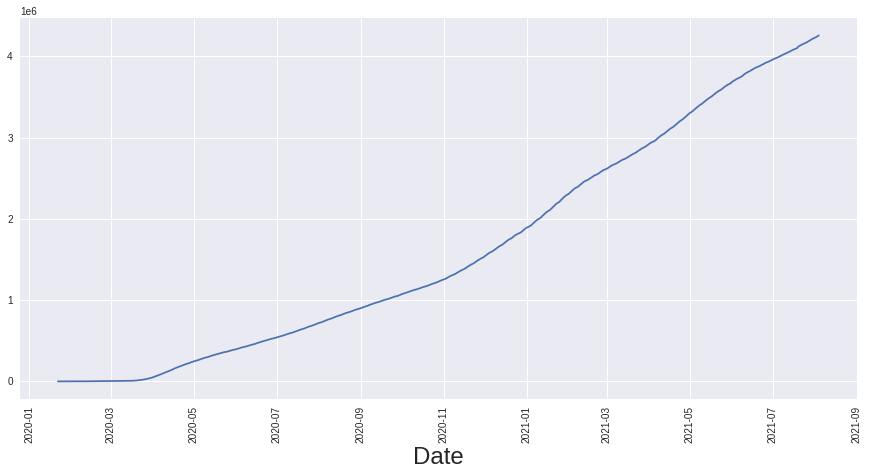

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  531
Model:             ExponentialSmoothing   SSE                      957896694.174
Optimized:                         True   AIC                           7671.314
Trend:                         Additive   BIC                           7718.337
Seasonal:                      Additive   AICC                          7672.018
Seasonal Periods:                     7   Date:                 Mon, 27 Dec 2021
Box-Cox:                          False   Time:                         15:45:45
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7368421                alpha                 True
smoothing_slope          

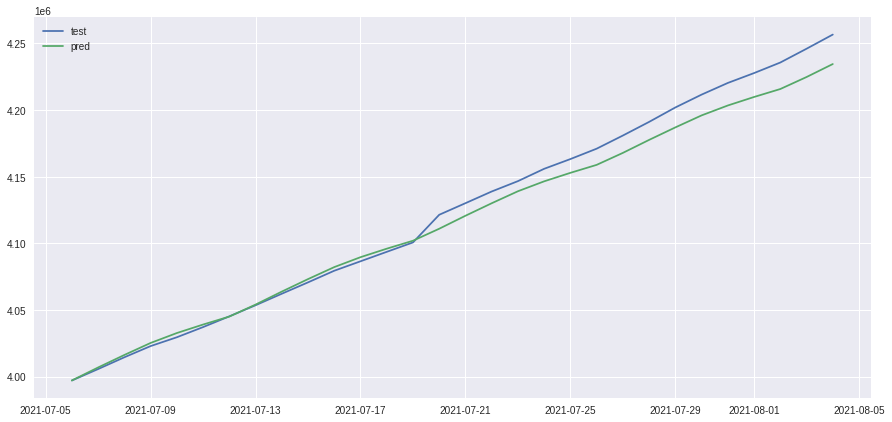

RMSE value : 10794.885407762147
MAE value : 8266.168514672294
r2 value : 0.9904312905691014
MSE value : 116529550.96671614


In [151]:
plt.rcParams['figure.figsize'] = [15,7]
plt.plot(covid_death['Deaths'])#plt.plot(new_india['Confirmed'].iloc[:10])
plt.xlabel("Date",size=24)
plt.xticks(rotation = 90)
plt.show()
model1 = ExponentialSmoothing(train,trend="add",seasonal="add",seasonal_periods=7).fit()
print(model1.summary())
pred1 = model1.forecast(30)
plt.plot(test,label="test")
plt.plot(pred1,label="pred")
plt.legend(loc="best")
plt.show()
print(f"RMSE value : {np.sqrt(metrics.mean_squared_error(test,pred1))}")
print(f"MAE value : {metrics.mean_absolute_error(test,pred1)}")
print(f"r2 value : {np.sqrt(metrics.r2_score(test,pred1))}")
print(f"MSE value : {metrics.mean_squared_error(test,pred1)}")

In [152]:
pred1

2021-07-06    3.997094e+06
2021-07-07    4.006841e+06
2021-07-08    4.016222e+06
2021-07-09    4.025227e+06
2021-07-10    4.032670e+06
2021-07-11    4.039048e+06
2021-07-12    4.045020e+06
2021-07-13    4.054016e+06
2021-07-14    4.063763e+06
2021-07-15    4.073144e+06
2021-07-16    4.082150e+06
2021-07-17    4.089593e+06
2021-07-18    4.095970e+06
2021-07-19    4.101943e+06
2021-07-20    4.110939e+06
2021-07-21    4.120685e+06
2021-07-22    4.130067e+06
2021-07-23    4.139072e+06
2021-07-24    4.146515e+06
2021-07-25    4.152893e+06
2021-07-26    4.158865e+06
2021-07-27    4.167861e+06
2021-07-28    4.177608e+06
2021-07-29    4.186989e+06
2021-07-30    4.195995e+06
2021-07-31    4.203438e+06
2021-08-01    4.209815e+06
2021-08-02    4.215788e+06
2021-08-03    4.224784e+06
2021-08-04    4.234530e+06
Freq: D, dtype: float64

#**Analysis**

**Evaluation Metrics for confirmed cases**

In [153]:
info={"Models":["LR","SVM","LASSO","ES"],"R2_SCORE":[0.68,0.95,0.92,0.87],"MAE":[22190136.76,10876433.60,14638369.98,1804317.63],"MSE":[667368273071669.4,236919966955800.8,309055201806531.56,5001652617356],"RMSE":[25833471.95,15392204.74,17579965.92,2236437.48]}
res=pd.DataFrame(info)
res

,Models,R2_SCORE,MAE,MSE,RMSE
0,LR,0.68,22190136.76,6.673683e+14,25833471.95
1,SVM,0.95,10876433.60,2.369200e+14,15392204.74
2,LASSO,0.92,14638369.98,3.090552e+14,17579965.92
3,ES,0.87,1804317.63,5.001653e+12,2236437.48


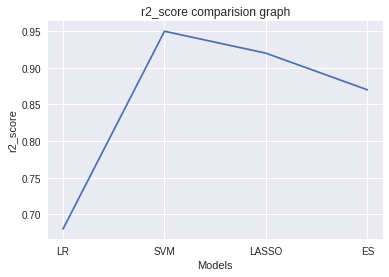

In [114]:
x=["LR","SVM","LASSO","ES"]
y=[0.68,0.95,0.92,0.87]
plt.plot(x,y)
plt.xlabel('Models')
plt.ylabel('r2_score')
plt.title('r2_score comparision graph')
plt.show()

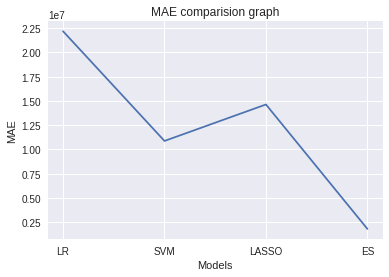

In [115]:
x=["LR","SVM","LASSO","ES"]
y=[22190136.76,10876433.60,14638369.98,1804317.63]
plt.plot(x,y)
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE comparision graph')
plt.show()

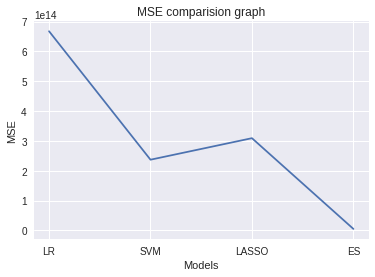

In [116]:
x=["LR","SVM","LASSO","ES"]
y=[667368273071669.4,236919966955800.8,309055201806531.56,5001652617356]
plt.plot(x,y)
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE comparision graph')
plt.show()

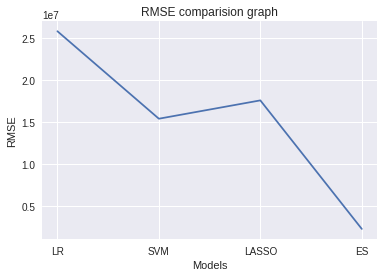

In [117]:
x=["LR","SVM","LASSO","ES"]
y=[25833471.95,15392204.74,17579965.92,2236437.48]
plt.plot(x,y)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE comparision graph')
plt.show()

**Evaluation Metrics for death cases**

In [118]:
info={"Models":["LR","SVM","LASSO","ES"],"R2_SCORE":[0.95,0.93,0.95,0.92],"MAE":[228098.20,273046.01,228098.20,931515.03],"MSE":[76379467305.60,116203879986.24,76379467279.09,1113167906791.85],"RMSE":[276368.35,340886.90,276368.35,1055067.72]}
res=pd.DataFrame(info)
res

,Models,R2_SCORE,MAE,MSE,RMSE
0,LR,0.95,228098.20,7.637947e+10,276368.35
1,SVM,0.93,273046.01,1.162039e+11,340886.90
2,LASSO,0.95,228098.20,7.637947e+10,276368.35
3,ES,0.92,931515.03,1.113168e+12,1055067.72


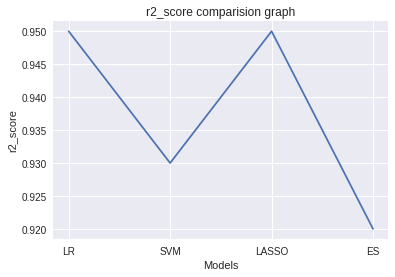

In [119]:
x=["LR","SVM","LASSO","ES"]
y=[0.95,0.93,0.95,0.92]
plt.plot(x,y)
plt.xlabel('Models')
plt.ylabel('r2_score')
plt.title('r2_score comparision graph')
plt.show()

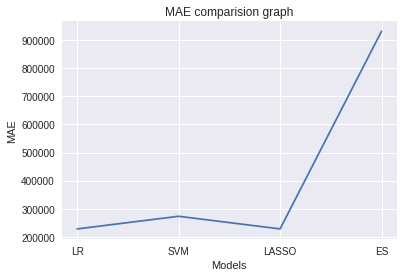

In [120]:
x=["LR","SVM","LASSO","ES"]
y=[228098.20,273046.01,228098.20,931515.03]
plt.plot(x,y)
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE comparision graph')
plt.show()

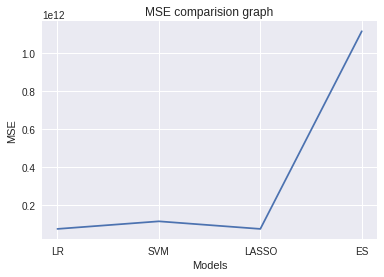

In [121]:
x=["LR","SVM","LASSO","ES"]
y=[76379467305.60,116203879986.24,76379467279.09,1113167906791.85]
plt.plot(x,y)
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE comparision graph')
plt.show()

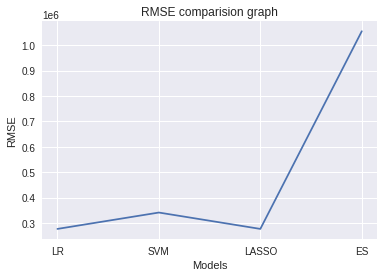

In [122]:
x=["LR","SVM","LASSO","ES"]
y=[276368.35,340886.90,276368.35,1055067.72]
plt.plot(x,y)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE comparision graph')
plt.show()

**Evaluation Metrics for recovered cases**

In [123]:
info={"Models":["LR","SVM","LASSO","ES"],"R2_SCORE":[0.90,0.97,0.90,0.87],"MAE":[10672646.18,5491320,10672646.18,1804317.63],"MSE":[146125183059281.38,49091184172999.53,146125183058823.78,5001652617356.59],"RMSE":[12088224.97,7006510.12,12088224.97,2236437.48]}
res=pd.DataFrame(info)
res

,Models,R2_SCORE,MAE,MSE,RMSE
0,LR,0.90,10672646.18,1.461252e+14,12088224.97
1,SVM,0.97,5491320.00,4.909118e+13,7006510.12
2,LASSO,0.90,10672646.18,1.461252e+14,12088224.97
3,ES,0.87,1804317.63,5.001653e+12,2236437.48


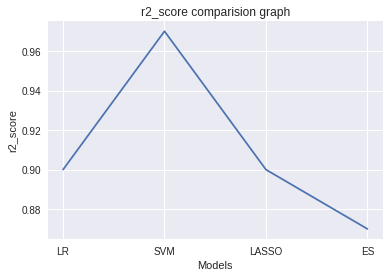

In [124]:
x=["LR","SVM","LASSO","ES"]
y=[0.90,0.97,0.90,0.87]
plt.plot(x,y)
plt.xlabel('Models')
plt.ylabel('r2_score')
plt.title('r2_score comparision graph')
plt.show()

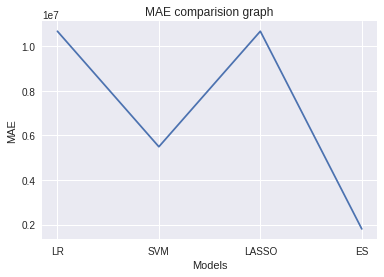

In [125]:
x=["LR","SVM","LASSO","ES"]
y=[10672646.18,5491320,10672646.18,1804317.63]
plt.plot(x,y)
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE comparision graph')
plt.show()

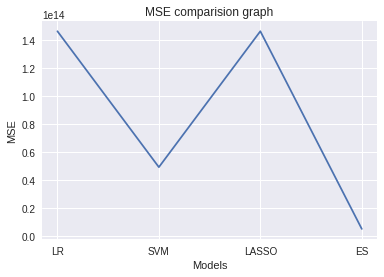

In [126]:
x=["LR","SVM","LASSO","ES"]
y=[146125183059281.38,49091184172999.53,146125183058823.78,5001652617356.59]
plt.plot(x,y)
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE comparision graph')
plt.show()

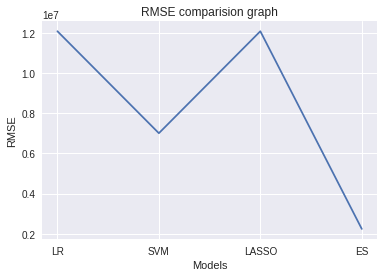

In [127]:
x=["LR","SVM","LASSO","ES"]
y=[12088224.97,7006510.12,12088224.97,2236437.48]
plt.plot(x,y)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE comparision graph')
plt.show()